# **Time Series Forecasting Pt. 1**
#### Author: Maslenchenko Oleksandra

In [45]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 9, 3

## **Data preparation**

In [46]:
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=ValueWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [47]:
variant = 80 % 7
print(f'Variant: {variant}')

Variant: 3


In [48]:
production = pd.read_csv('palm_data/production_good.csv')

In [49]:
REGIONS = [['JH', 'Johor', 'JH'], 
           ['PH', 'Pahang', 'PH'],
           ['PRK', 'Perak', 'PRK'], 
           ['OtherPEN', 'Other Pen. States', 'OtherPEN'],
           ['PEN', 'Peninsula', 'Pmalay'],
           ['SBH', 'Sabah', 'SBH'],
           ['SWK', 'Sarawak', 'SWK']]

print(f'My region: {REGIONS[variant]}')

My region: ['OtherPEN', 'Other Pen. States', 'OtherPEN']


In [50]:
production.head()

index Region  Year  Month  Production  Diff_production
0      0     JH  1998      1     118.359            0.000
1      1     JH  1998      2     147.988            0.000
2      2     JH  1998      3     145.514           29.629
3      3     JH  1998      4     154.638           -2.474
4      4     JH  1998      5     155.827            9.124

In [51]:
df = production[production['Region'].isin(REGIONS[variant])]
df.head()

index    Region  Year  Month  Production  Diff_production
711      0  OtherPEN  1998      1      89.690          -17.254
712      1  OtherPEN  1998      2     112.724          -81.581
713      2  OtherPEN  1998      3     113.573           23.034
714      3  OtherPEN  1998      4     113.454            0.849
715      4  OtherPEN  1998      5     119.671           -0.119

In [52]:
def process_df(df):
    df.reset_index(inplace=True)
    df.set_index([pd.to_datetime(['{0}-{1}-01'.format(x, y) for (x, y) in zip(df.Year, df.Month)])],
                    inplace=True)
    df.drop(['index', 'Year', 'Diff_production', 'level_0'], axis=1, inplace=True)
    df['Time'] = np.arange(len(df))
    return df


In [53]:
df = process_df(df)
df.head(10)

Region  Month  Production  Time
1998-01-01  OtherPEN      1      89.690     0
1998-02-01  OtherPEN      2     112.724     1
1998-03-01  OtherPEN      3     113.573     2
1998-04-01  OtherPEN      4     113.454     3
1998-05-01  OtherPEN      5     119.671     4
1998-06-01  OtherPEN      6     128.955     5
1998-07-01  OtherPEN      7     143.201     6
1998-08-01  OtherPEN      8     151.091     7
1998-09-01  OtherPEN      9     156.120     8
1998-10-01  OtherPEN     10     141.901     9

<Axes: >

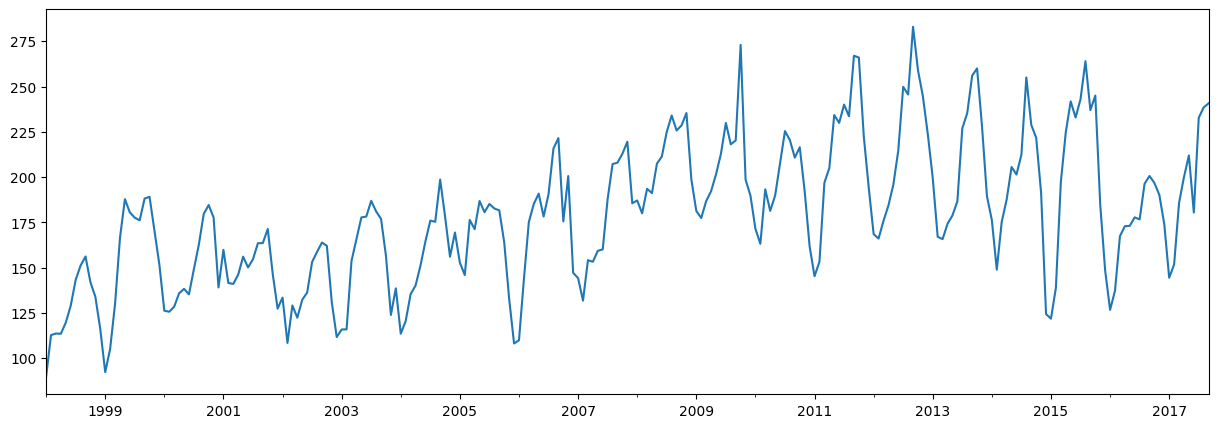

In [54]:
df['Production'].plot(figsize=(15,5))

In [55]:
train_size = int(len(df) * 0.70)
val_size = int(len(df) * 0.15)

train = df[:train_size]
validation = df[train_size:train_size + val_size]
test = df[train_size + val_size:]

train.head()

Region  Month  Production  Time
1998-01-01  OtherPEN      1      89.690     0
1998-02-01  OtherPEN      2     112.724     1
1998-03-01  OtherPEN      3     113.573     2
1998-04-01  OtherPEN      4     113.454     3
1998-05-01  OtherPEN      5     119.671     4

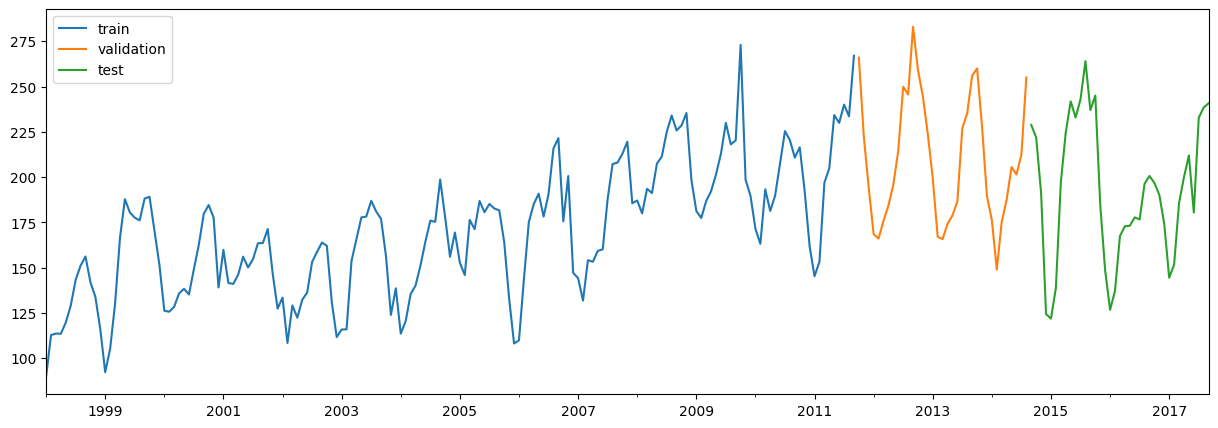

In [56]:
train['Production'].plot(figsize=(15,5), label='train')
validation['Production'].plot(figsize=(15,5), label='validation')
test['Production'].plot(figsize=(15,5), label='test')
plt.legend()
plt.show()

In [57]:
ts = df['Production'].to_numpy()
ts_train = train['Production'].to_numpy()
ts_validation = validation['Production'].to_numpy()
ts_test = test['Production'].to_numpy()

## **Multiplicative vs Additive**

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_decomposition(ts, model, period, extrapolate_trend):

    ss_decomposition = seasonal_decompose(x=ts, model=model, period=period, extrapolate_trend=extrapolate_trend)
    estimated_trend = ss_decomposition.trend
    estimated_seasonal = ss_decomposition.seasonal
    estimated_residual = ss_decomposition.resid

    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    axes[0].plot(ts, label='Original')
    axes[0].legend(loc='upper left')

    axes[1].plot(estimated_trend, label='Trend')
    axes[1].legend(loc='upper left')

    axes[2].plot(estimated_seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')

    axes[3].plot(estimated_residual, label='Residuals')
    axes[3].legend(loc='upper left')

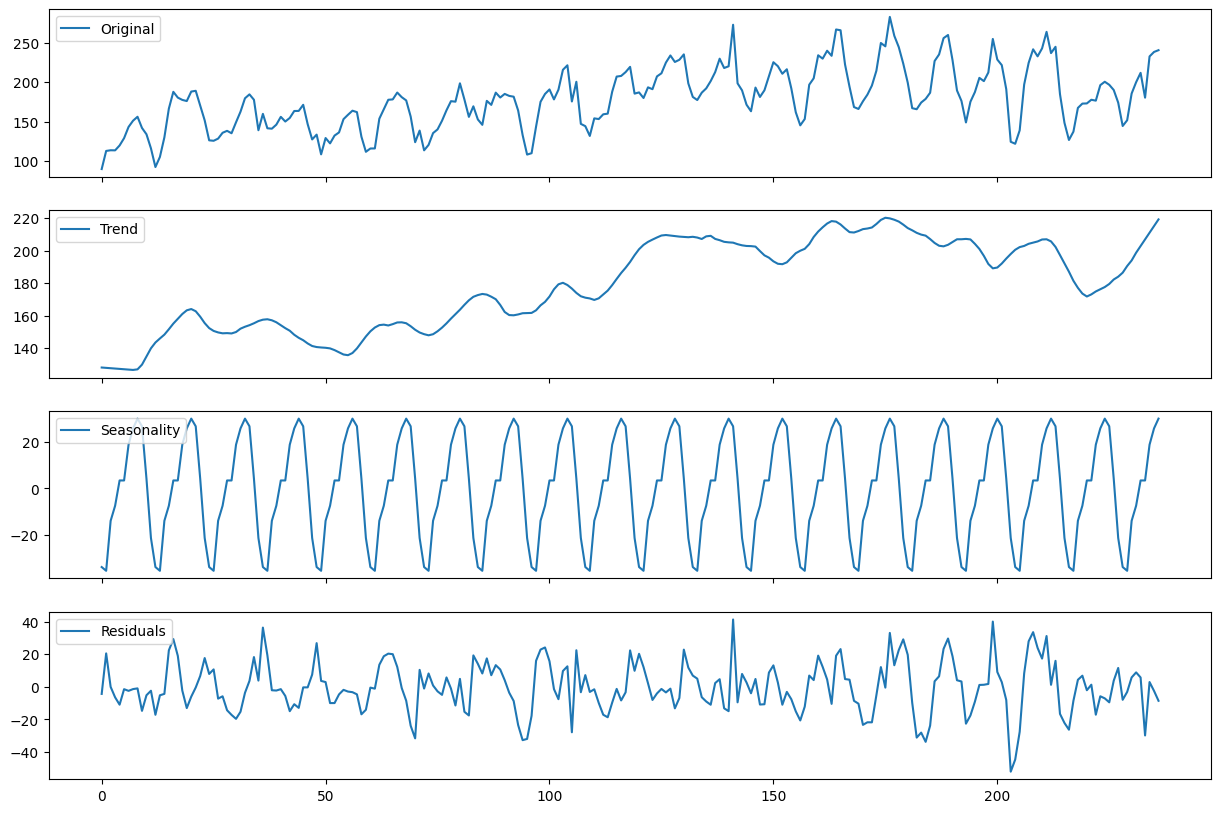

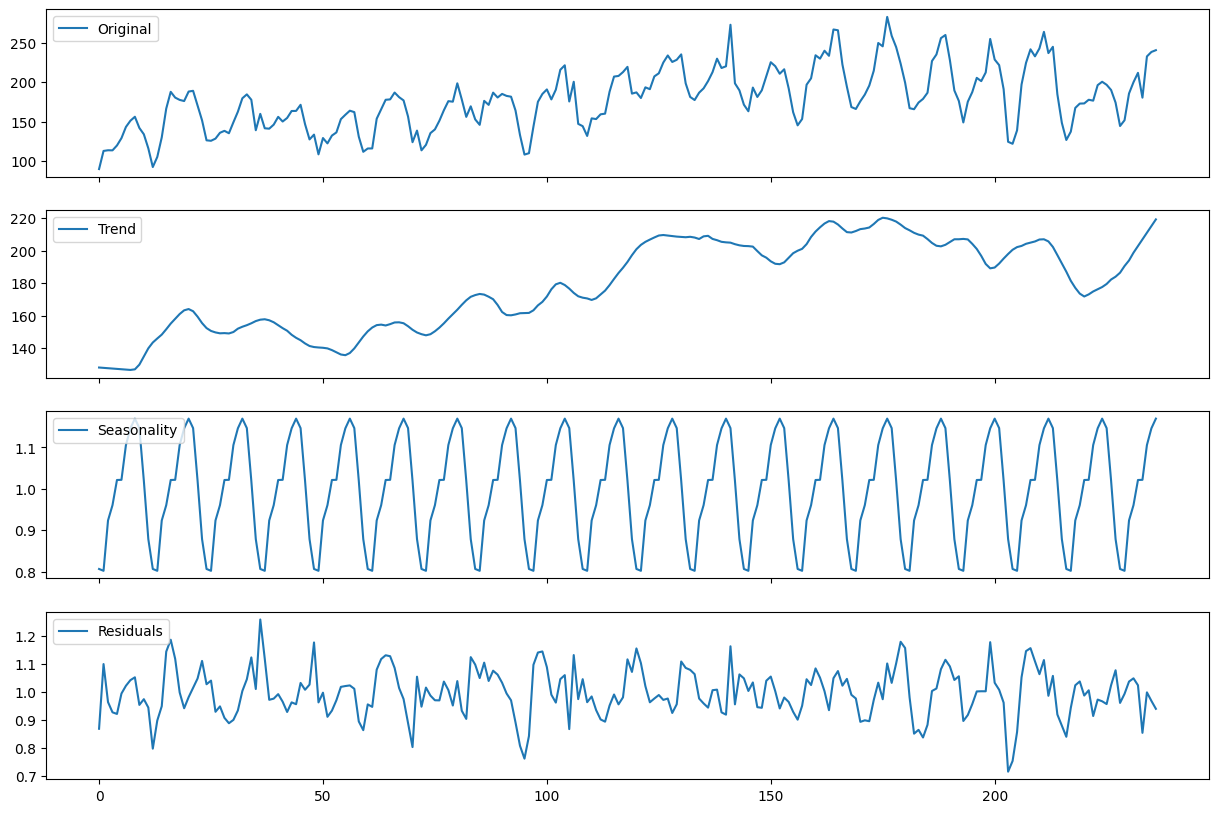

In [59]:
period = 12

plot_decomposition(ts, 'additive', period, True)
plot_decomposition(ts, 'multiplicative', period, True)

## **Seasonality**

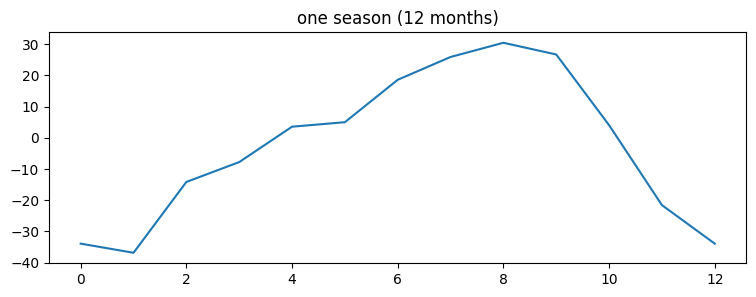

In [60]:
ss_decomposition = seasonal_decompose(x=ts, model='additive', period=12)

season_predict = ss_decomposition.seasonal[-24:]

plt.plot(ss_decomposition.seasonal[0:13])
plt.title('one season (12 months)')
plt.show()

## **Trend**

In [61]:
ss_decomposition_train = seasonal_decompose(x=ts_train, model='additive', period=12, extrapolate_trend=True)
estimated_trend = ss_decomposition.trend

### **Prediction by fitting plolynomials**

In [62]:
def mean_absolute_percentage_error(actual, predicted): 
    absolute_percent_error = np.abs((actual - predicted)/actual)
    absolute_percent_error[np.isinf(absolute_percent_error)] = 0
    return np.mean(absolute_percent_error) * 100

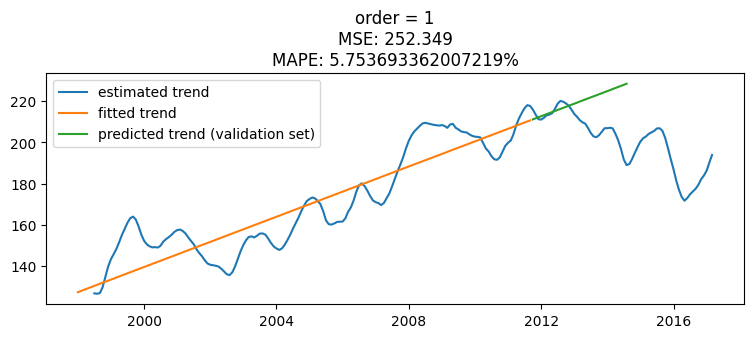

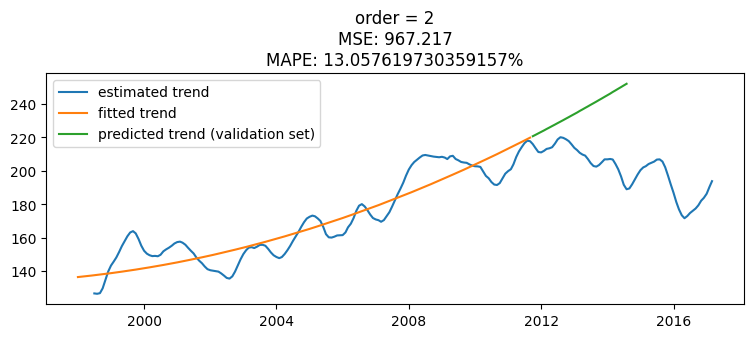

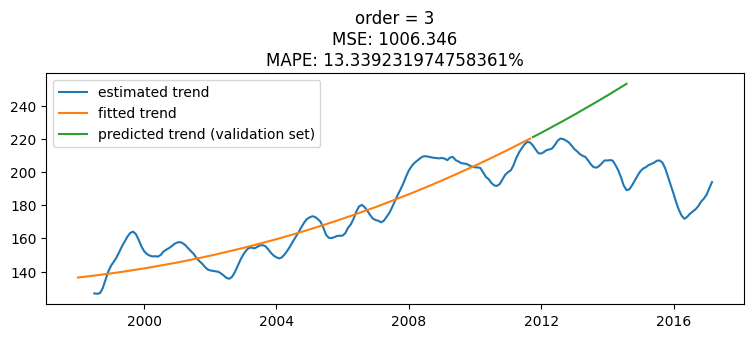

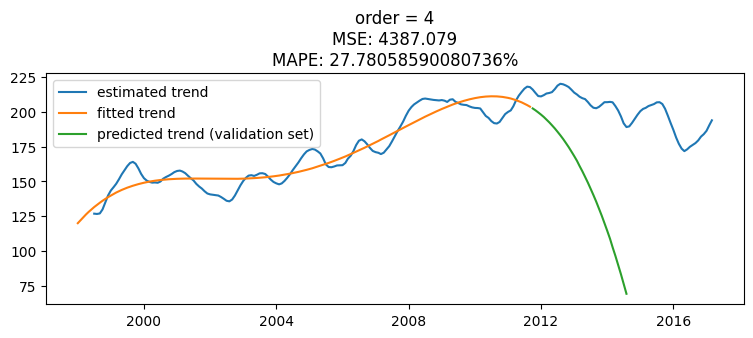

In [63]:
val_start = len(ts_train)
val_end = len(ts_train) + len(ts_validation)

for order in range(1, 5):
    coeffs_train = np.polyfit(np.arange(len(ts_train)), ts_train, deg=order)
    poly_mdl = np.poly1d(coeffs_train)
    fitted_trend = pd.Series(data=poly_mdl(np.arange(len(ts_train))), index=train.index)
    predicted_trend = pd.Series(data=poly_mdl(np.arange(val_start, val_end)), index=validation.index)
    estimated_trend = pd.Series(data=estimated_trend, index = df.index)
    mse = mean_squared_error(estimated_trend[val_start:val_end], predicted_trend)
    mape = mean_absolute_percentage_error(estimated_trend[val_start:val_end], predicted_trend.to_numpy())
    plt.plot(estimated_trend, label='estimated trend')
    plt.plot(fitted_trend, label='fitted trend')
    plt.plot(predicted_trend, label='predicted trend (validation set)')
    plt.legend()
    plt.title(f'order = {order}\nMSE: {round(mse, 3)}\nMAPE: {mape}%')
    plt.show()

**Choosing the polynomial of degree 1, since it is the most stable compared to polynomials of higher degrees**

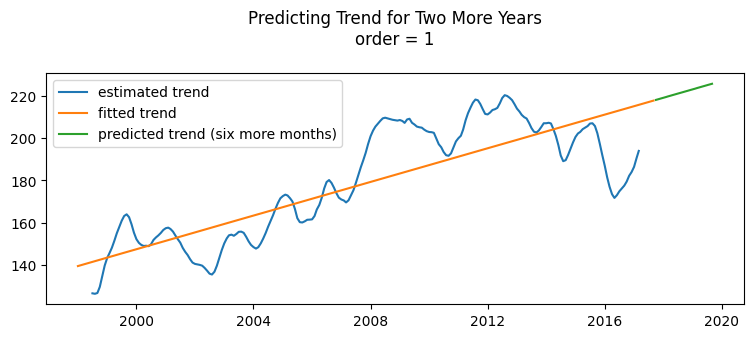

In [64]:
val_start = len(ts)
val_end = len(ts) + 24

last_idx = pd.to_datetime(test.index[-1])
new_dates = pd.date_range(start=last_idx, periods=25, freq='MS')[1:]  # we use 7 because the start date is included, so we skip it

coeffs_train = np.polyfit(np.arange(len(ts)), ts, deg=1)
poly_mdl = np.poly1d(coeffs_train)
fitted_trend = pd.Series(data=poly_mdl(np.arange(len(ts))), index=df.index)
predicted_trend = pd.Series(data=poly_mdl(np.arange(val_start, val_end)), index=new_dates)
estimated_trend = pd.Series(data=estimated_trend, index=df.index)
plt.plot(estimated_trend, label='estimated trend')
plt.plot(fitted_trend, label='fitted trend')
plt.plot(predicted_trend, label='predicted trend (six more months)')
plt.legend()
plt.title('Predicting Trend for Two More Years\norder = 1\n')
plt.show()

## **Stationarity**

In [65]:
ts = pd.Series(data=ts, index=df.index)
chunks = np.array_split(ts, indices_or_sections=20)

def check_mean_var(chunks):
    print('{} | {:7} | {}'.format('Chunk', 'Mean', 'Variance'))
    print('-' * 26)
    for i, chunk in enumerate(chunks, 1):
        print('{:5} | {:.6} | {:.6}'.format(i, np.mean(chunk), np.var(chunk)))

check_mean_var(chunks)

Chunk | Mean    | Variance
--------------------------
    1 | 126.69 | 341.42
    2 | 159.554 | 1009.9
    3 | 148.496 | 440.018
    4 | 151.788 | 135.622
    5 | 136.807 | 324.009
    6 | 155.873 | 637.017
    7 | 156.508 | 591.457
    8 | 163.995 | 554.366
    9 | 177.803 | 916.894
   10 | 176.961 | 831.244
   11 | 209.791 | 352.409
   12 | 206.781 | 648.623
   13 | 194.465 | 444.384
   14 | 215.645 | 1371.86
   15 | 217.544 | 1416.23
   16 | 205.637 | 1065.42
   17 | 194.01 | 1152.77
   18 | 211.885 | 1937.38
   19 | 170.319 | 535.492
   20 | 195.467 | 992.107


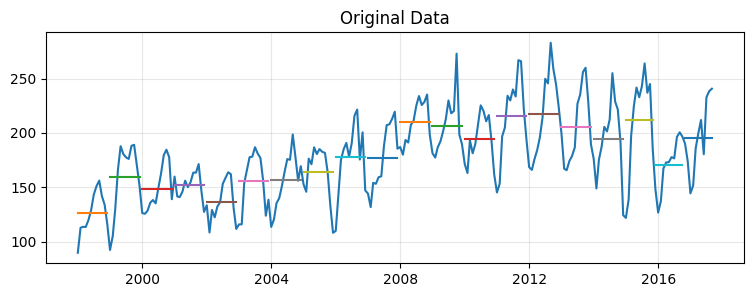

In [66]:
plt.plot(ts)


for i, chunk in enumerate(chunks, 1):
    data = pd.Series(data=[np.mean(chunk)]*len(chunk), index = chunk.index)
    plt.plot(data)

plt.title('Original Data')
plt.grid(alpha=0.3)
plt.show()

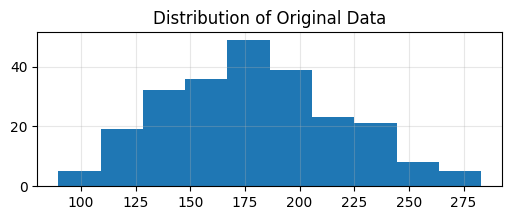

In [67]:
ax = ts.hist(figsize=(6,2))
ax.set_title('Distribution of Original Data')
ax.grid(alpha=0.3)
plt.show()

In [68]:
from statsmodels.tsa.stattools import adfuller
def stationarity_test(ts):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, regression='c', autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)    

In [69]:
print('Conducting Dickey-Fuller test for Original Data:')
stationarity_test(ts)

Conducting Dickey-Fuller test for Original Data:
Results of Dickey-Fuller Test:
Test Statistic                  -1.624086
p-value                          0.470588
Lags Used                       15.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


## **Decomposition vs Differencing**

In [70]:
ss_decomposition_ad = seasonal_decompose(x=ts, model='additive', period=12, extrapolate_trend=True)
ss_decomposition_mul = seasonal_decompose(x=ts, model='multiplicative', period=12, extrapolate_trend=True)

ad_residuals = ss_decomposition_ad.resid
mul_residuals = ss_decomposition_mul.resid

ad_residuals = pd.Series(data=ad_residuals, index=df.index)
mul_residuals = pd.Series(data=mul_residuals, index=df.index)

chunks_ad = np.array_split(ad_residuals, indices_or_sections=20)
chunks_mul = np.array_split(mul_residuals, indices_or_sections=20)

print('For additive decomposition residuals:')
check_mean_var(chunks_ad)
print()
print('For multiplicative decomposition residuals:')
check_mean_var(chunks_mul)

For additive decomposition residuals:
Chunk | Mean    | Variance
--------------------------
    1 | -2.49035 | 65.6956
    2 | 3.88167 | 204.228
    3 | -3.24478 | 136.366
    4 | 1.05248 | 190.641
    5 | -2.9033 | 115.539
    6 | 2.41207 | 265.503
    7 | -1.26898 | 98.9067
    8 | -2.12623 | 300.602
    9 | 5.45442 | 264.354
   10 | -2.80616 | 123.611
   11 | 2.591 | 121.66
   12 | 0.3415 | 216.567
   13 | -2.52201 | 72.7618
   14 | 4.59227 | 164.582
   15 | 1.5586 | 370.602
   16 | -1.78482 | 479.445
   17 | -4.1634 | 432.09
   18 | 6.40352 | 604.794
   19 | -7.83389 | 101.904
   20 | -1.2165 | 120.839

For multiplicative decomposition residuals:
Chunk | Mean    | Variance
--------------------------
    1 | 0.97994 | 0.00384642
    2 | 1.01526 | 0.0115653
    3 | 0.979489 | 0.00482023
    4 | 1.01598 | 0.00753887
    5 | 0.981601 | 0.00608295
    6 | 1.01456 | 0.00980853
    7 | 0.990047 | 0.00319191
    8 | 0.990199 | 0.011695
    9 | 1.02835 | 0.00961976
   10 | 0.982182 | 0.0040

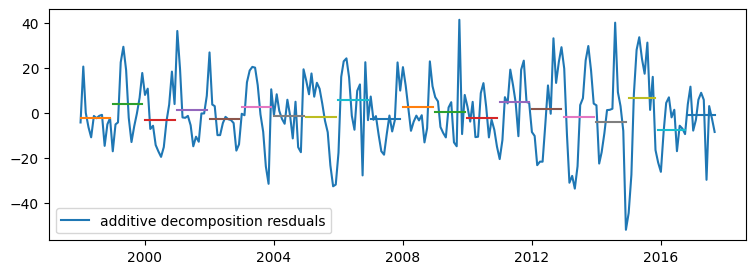

In [71]:
plt.plot(ad_residuals, label='additive decomposition resduals')

for i, chunk in enumerate(chunks_ad, 1):
    data = pd.Series(data=[np.mean(chunk)]*len(chunk), index=chunk.index)
    plt.plot(data)

plt.legend()
plt.show()

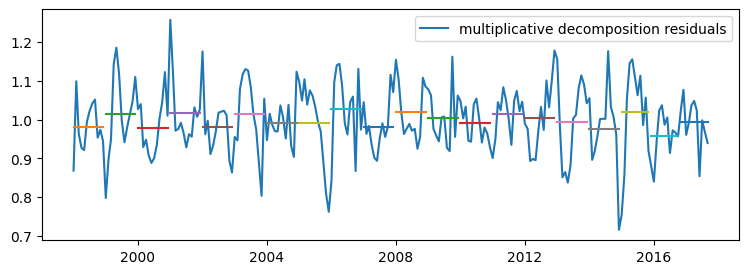

In [72]:
plt.plot(mul_residuals, label='multiplicative decomposition residuals')

for i, chunk in enumerate(chunks_mul, 1):
    data = pd.Series(data=[np.mean(chunk)]*len(chunk), index=chunk.index)
    plt.plot(data)

plt.legend()
plt.show()

**Here after the first differencing (with lag 1) I remove trend component, after the second differencing with lag 12 I remove the seasonal component**

Chunk | Mean    | Variance
--------------------------
    1 | 1.38238 | 266.777
    2 | -0.609923 | 404.953
    3 | -2.79831 | 147.384
    4 | 5.327 | 102.978
    5 | -4.56008 | 243.962
    6 | 1.76992 | 146.842
    7 | 1.84208 | 406.841
    8 | -3.59208 | 577.698
    9 | 2.60833 | 321.32
   10 | -1.938 | 88.822
   11 | -0.33275 | 905.648
   12 | 5.4785 | 710.307
   13 | -3.35442 | 260.126
   14 | -3.58333 | 244.105
   15 | -0.0155833 | 573.051
   16 | 2.94783 | 386.534
   17 | -3.71575 | 428.04
   18 | 6.37633 | 634.303


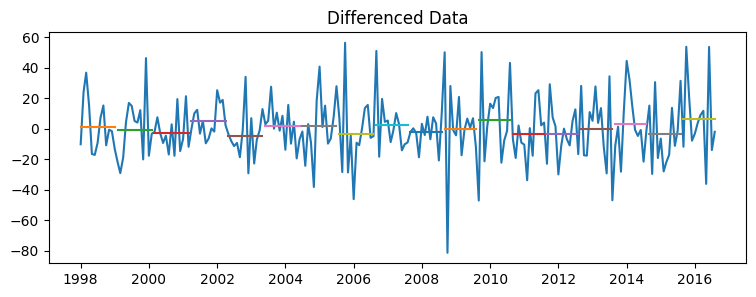

In [73]:
difference_lag_1 = ts[:-1].to_numpy() - ts[1:].to_numpy()

difference_lag_12 = list()
for i in range(12, len(difference_lag_1)):
    diff = difference_lag_1[i-12] - difference_lag_1[i]
    difference_lag_12.append(diff)

difference_lag_12 = pd.Series(data=difference_lag_12, index=df.index[:-13])


chunks_diff = np.array_split(difference_lag_12, indices_or_sections=18)

check_mean_var(chunks_diff)

plt.plot(difference_lag_12)

for i, chunk in enumerate(chunks_diff, 1):
    data = pd.Series(data=[np.mean(chunk)]*len(chunk), index = chunk.index)
    plt.plot(data)

plt.title('Differenced Data')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


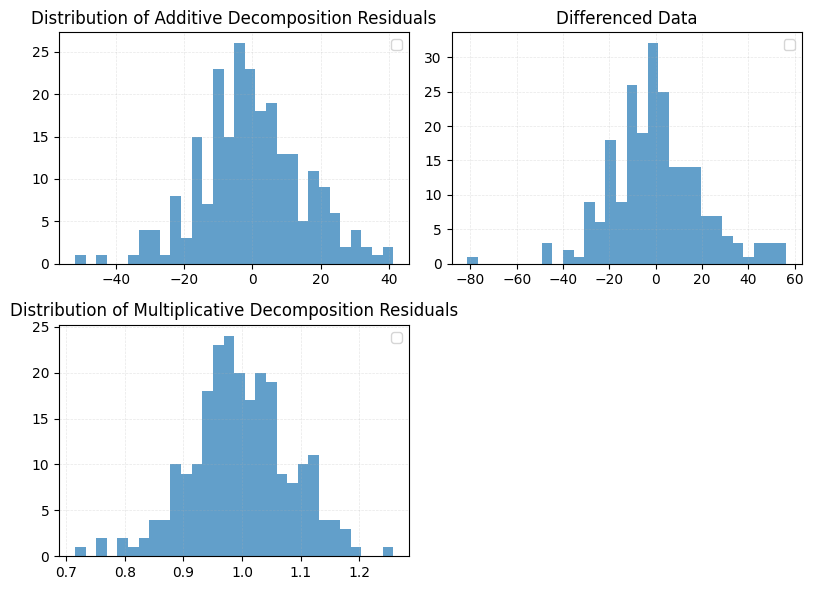

In [74]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

data = [ad_residuals, difference_lag_12, mul_residuals]
labels = ['Distribution of Additive Decomposition Residuals', 'Differenced Data', 'Distribution of Multiplicative Decomposition Residuals']

for i, ax in enumerate(axes.flatten()[:3]):
    ax.hist(data[i], bins=30, alpha=0.7)
    ax.legend(loc='upper right')
    ax.set_title(labels[i])
    ax.grid(True, linestyle='--', which='both', linewidth=0.5, alpha=0.3)

axes[1, 1].axis('off')
plt.tight_layout()
plt.show()

In [75]:
print('Conducting Dickey-Fuller test for residuals of additive decomposition:')
stationarity_test(ad_residuals)
print()
print('Conducting Dickey-Fuller test for differenced data:')
stationarity_test(difference_lag_12)
print()
print('Conducting Dickey-Fuller test for residuals of multiplicative decomposition:')
stationarity_test(mul_residuals)

Conducting Dickey-Fuller test for residuals of additive decomposition:
Results of Dickey-Fuller Test:
Test Statistic                -7.939815e+00
p-value                        3.337203e-12
Lags Used                      1.400000e+01
Number of Observations Used    2.220000e+02
Critical Value (1%)           -3.460154e+00
Critical Value (5%)           -2.874649e+00
Critical Value (10%)          -2.573757e+00
dtype: float64

Conducting Dickey-Fuller test for differenced data:
Results of Dickey-Fuller Test:
Test Statistic                -8.132802e+00
p-value                        1.078889e-12
Lags Used                      1.200000e+01
Number of Observations Used    2.110000e+02
Critical Value (1%)           -3.461727e+00
Critical Value (5%)           -2.875337e+00
Critical Value (10%)          -2.574124e+00
dtype: float64

Conducting Dickey-Fuller test for residuals of multiplicative decomposition:
Results of Dickey-Fuller Test:
Test Statistic                -7.747937e+00
p-value        

In [76]:
std_diff = difference_lag_12.std()
std_ad_residuals = np.std(ad_residuals)
std_mul_residuals = np.std(mul_residuals)

print(f'std for differenced data: {std_diff}')
print(f'std for additive decomposition residuals: {std_ad_residuals}')
print(f'std for multiplicative decomposition residuals: {std_mul_residuals}')

std for differenced data: 19.757028313920728
std for additive decomposition residuals: 15.301717101042001
std for multiplicative decomposition residuals: 0.08514987759888355


In [77]:
ss_decomposition_ad_train = seasonal_decompose(x=ts_train, model='additive', period=12, extrapolate_trend=True)
ss_decomposition_ad_val = seasonal_decompose(x=ts_validation, model='additive', period=12, extrapolate_trend=True)
ss_decomposition_ad_test = seasonal_decompose(x=ts_test, model='additive', period=12, extrapolate_trend=True)

ad_train_residuals = ss_decomposition_ad_train.resid
ad_val_residuals = ss_decomposition_ad_val.resid
ad_test_residuals = ss_decomposition_ad_test.resid

ad_train_season = ss_decomposition_ad_train.seasonal
ad_val_season = ss_decomposition_ad_val.seasonal
ad_test_season = ss_decomposition_ad_test.seasonal

ad_train_trend = ss_decomposition_ad_train.trend
ad_val_trend = ss_decomposition_ad_val.trend
ad_test_trend = ss_decomposition_ad_test.trend

In [78]:
ss_decomposition_mul_train = seasonal_decompose(x=ts_train, model='multiplicative', period=12, extrapolate_trend=True)
ss_decomposition_mul_val = seasonal_decompose(x=ts_validation, model='multiplicative', period=12, extrapolate_trend=True)
ss_decomposition_mul_test = seasonal_decompose(x=ts_test, model='multiplicative', period=12, extrapolate_trend=True)

mul_train_residuals = ss_decomposition_mul_train.resid
mul_val_residuals = ss_decomposition_mul_val.resid
mul_test_residuals = ss_decomposition_mul_test.resid

mul_train_season = ss_decomposition_mul_train.seasonal
mul_val_season = ss_decomposition_mul_val.seasonal
mul_test_season = ss_decomposition_mul_test.seasonal

mul_train_trend = ss_decomposition_mul_train.trend
mul_val_trend = ss_decomposition_mul_val.trend
mul_test_trend = ss_decomposition_mul_test.trend

In [79]:
train_size = int(len(difference_lag_12) * 0.70)
val_size = int(len(difference_lag_12) * 0.15)

diff_train = difference_lag_12[:train_size]
diff_validation = difference_lag_12[train_size:train_size + val_size]
diff_test = difference_lag_12[train_size + val_size:]

## **ACF and PACF**

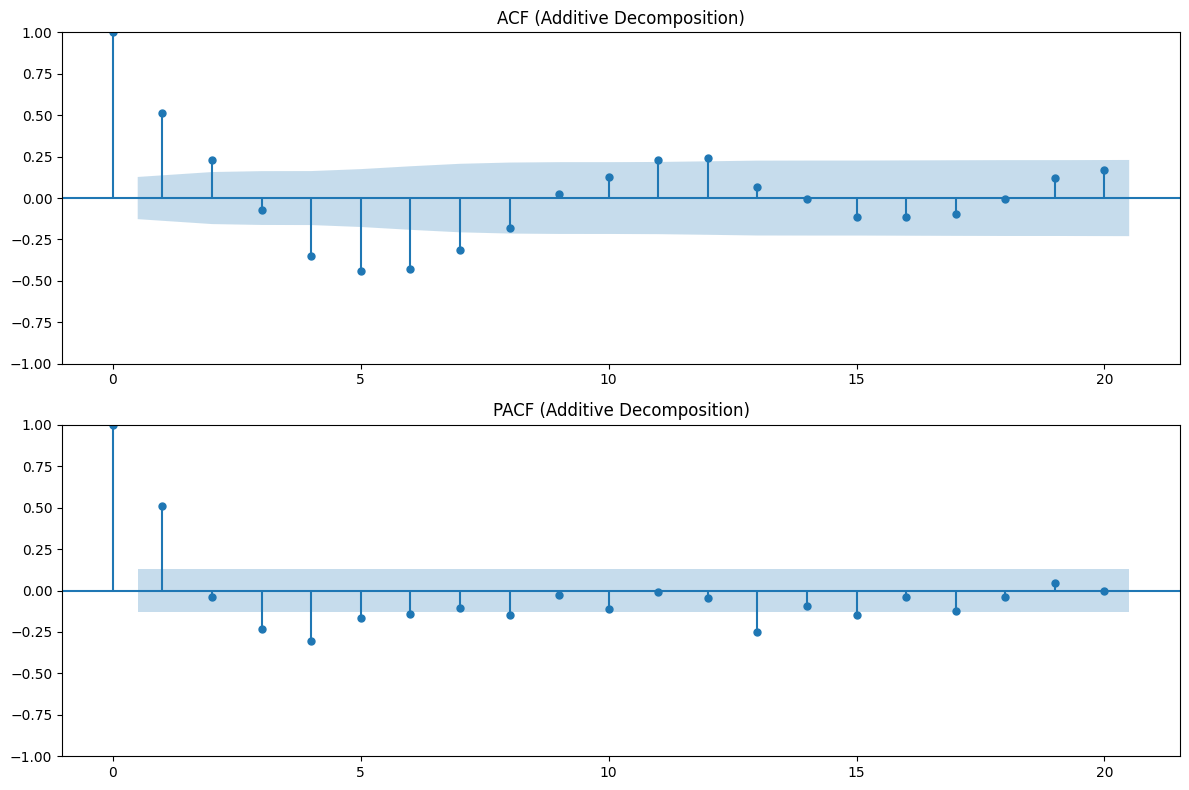

In [80]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(ad_residuals, lags=20, ax=ax1)
ax1.set_title('ACF (Additive Decomposition)')
plot_pacf(ad_residuals, lags=20, ax=ax2)
ax2.set_title('PACF (Additive Decomposition)')
plt.tight_layout()
plt.show()

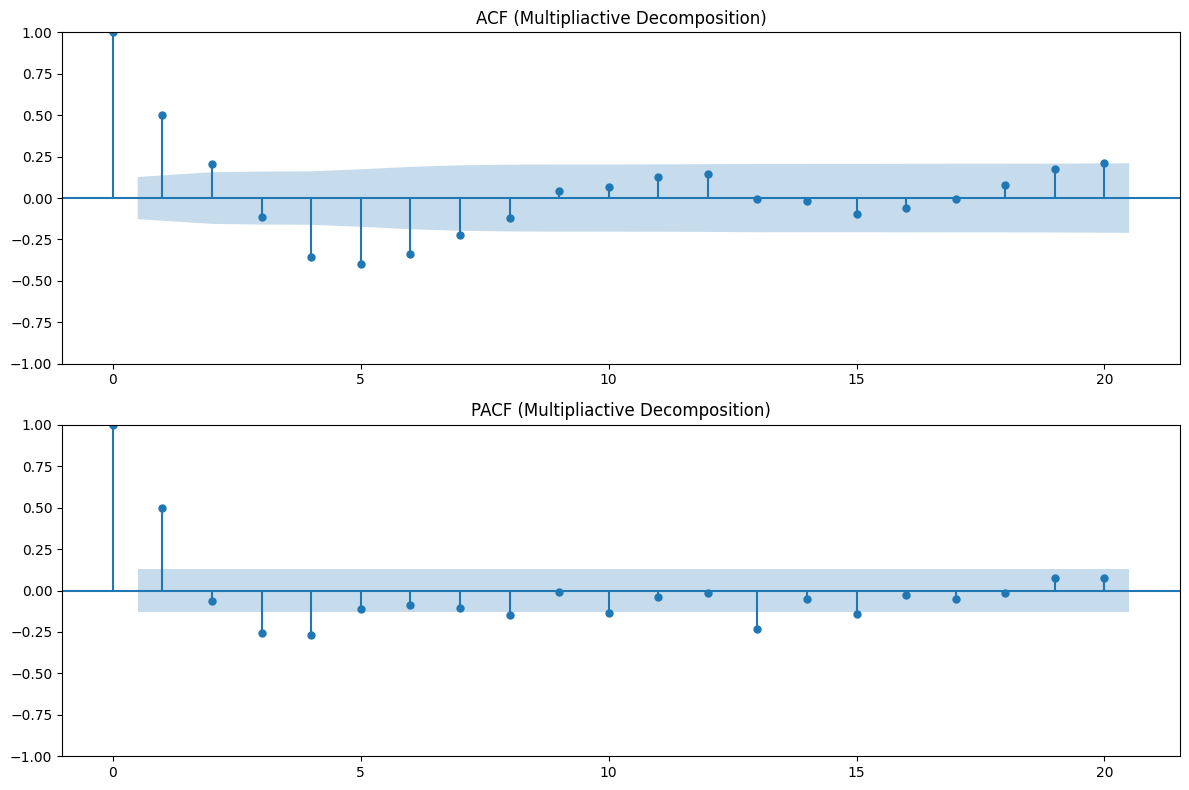

In [81]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(mul_residuals, lags=20, ax=ax1)
ax1.set_title('ACF (Multipliactive Decomposition)')
plot_pacf(mul_residuals, lags=20, ax=ax2)
ax2.set_title('PACF (Multipliactive Decomposition)')
plt.tight_layout()
plt.show()

## **Smoothing**

## **1. Moving Average**

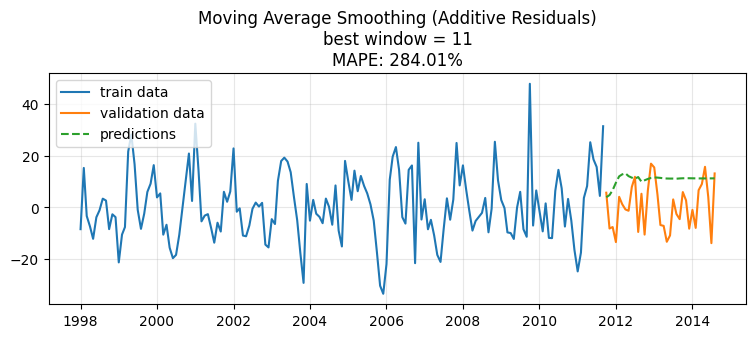

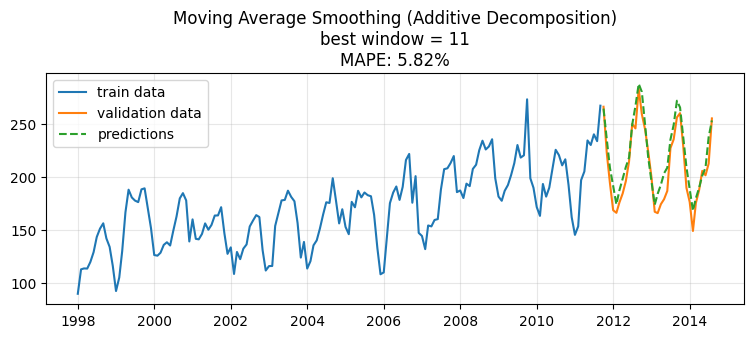

In [82]:
def moving_average(ts, to_predict, window):
    predictions = list(ts[-window:])
    for _ in range(to_predict):
        pred = sum(predictions[-window:]) / window
        predictions.append(pred)
    return predictions[window:]

best_window = 1
best_mape = float('inf')
for window in range(1, 12):
    predictions = moving_average(ad_train_residuals, len(ad_val_residuals), window)
    ma_mape = mean_absolute_percentage_error(ad_val_residuals, predictions)
    if ma_mape < best_mape:
        best_mape = ma_mape
        best_window = window

predictions = moving_average(ad_train_residuals, len(ad_val_residuals), best_window)
ma_mape = mean_absolute_percentage_error(ad_val_residuals, predictions)

plt.plot(pd.Series(data=ad_train_residuals, index=train.index), label='train data')
plt.plot(pd.Series(data=ad_val_residuals, index=validation.index), label='validation data')
plt.plot(pd.Series(data=predictions, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Moving Average Smoothing (Additive Residuals)\nbest window = {best_window}\nMAPE: {round(ma_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

full_preds = predictions + ad_val_trend + ad_val_season
ma_mape = mean_absolute_percentage_error(ts_validation, full_preds)
plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Moving Average Smoothing (Additive Decomposition)\nbest window = {best_window}\nMAPE: {round(ma_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

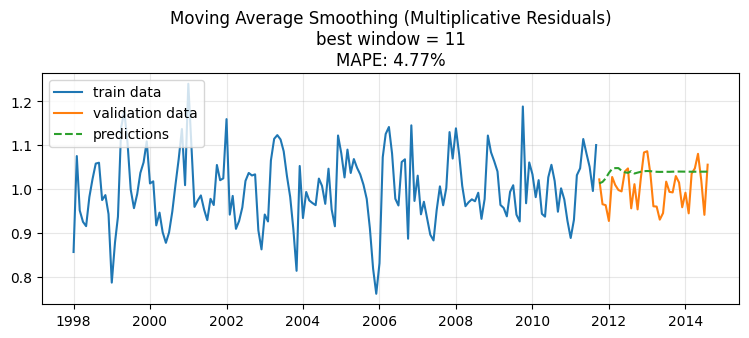

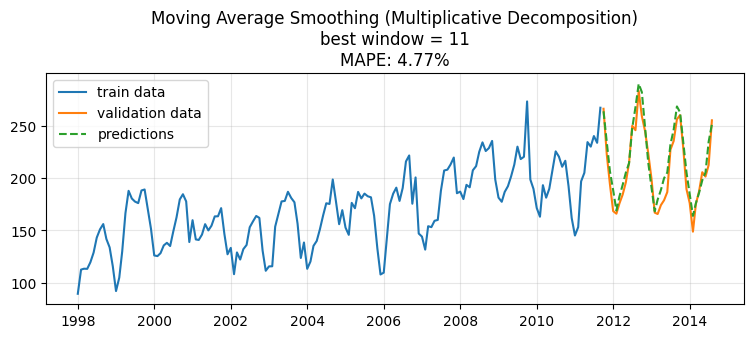

In [83]:
best_window = 1
best_mape = float('inf')
for window in range(1, 12):
    predictions = moving_average(mul_train_residuals, len(mul_val_residuals), window)
    ma_mape = mean_absolute_percentage_error(mul_val_residuals, predictions)
    if ma_mape < best_mape:
        best_mape = ma_mape
        best_window = window

predictions = moving_average(mul_train_residuals, len(mul_val_residuals), best_window)
ma_mape = mean_absolute_percentage_error(mul_val_residuals, predictions)

plt.plot(pd.Series(data=mul_train_residuals, index=train.index), label='train data')
plt.plot(pd.Series(data=mul_val_residuals, index=validation.index), label='validation data')
plt.plot(pd.Series(data=predictions, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Moving Average Smoothing (Multiplicative Residuals)\nbest window = {best_window}\nMAPE: {round(ma_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

full_preds = predictions * mul_val_trend * mul_val_season
ma_mape = mean_absolute_percentage_error(ts_validation, full_preds)
plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Moving Average Smoothing (Multiplicative Decomposition)\nbest window = {best_window}\nMAPE: {round(ma_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()



**It can be seen that predicting with differenced data is not efficient, so I will not do it further**

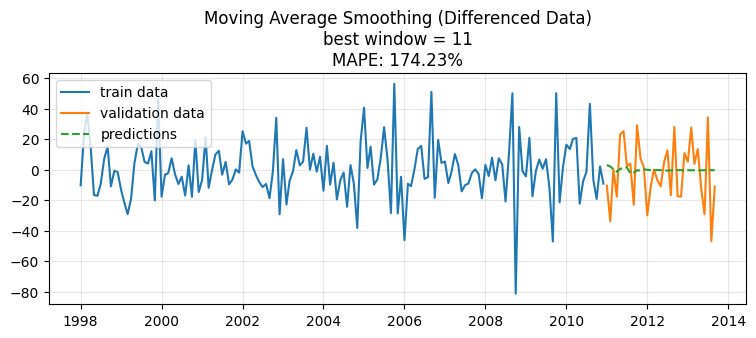

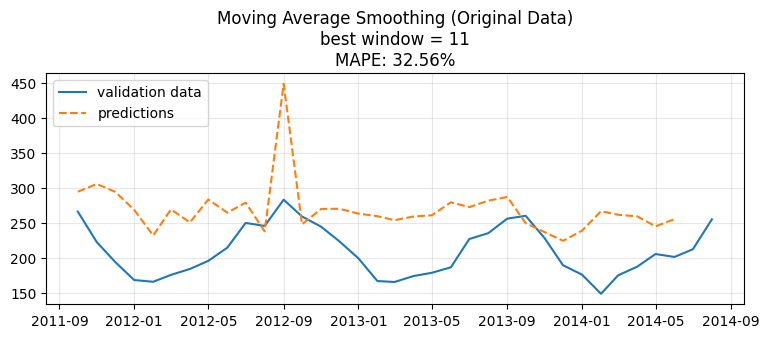

In [84]:
best_window = 1
best_mape = float('inf')
for window in range(1, 12):
    predictions = moving_average(diff_train.to_numpy(), len(diff_validation), window)
    ma_mape = mean_absolute_percentage_error(diff_validation, predictions)
    if ma_mape < best_mape:
        best_mape = ma_mape
        best_window = window

predictions = moving_average(diff_train.to_numpy(), len(diff_validation), best_window)
ma_mape = mean_absolute_percentage_error(diff_validation, predictions)

plt.plot(diff_train, label='train data')
plt.plot(diff_validation, label='validation data')
plt.plot(pd.Series(data=predictions, index=diff_validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Moving Average Smoothing (Differenced Data)\nbest window = {best_window}\nMAPE: {round(ma_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

modififed_preds_1 = np.insert(predictions, 0, ts_train[-1])
modififed_preds_1 = modififed_preds_1[:-1]
full_preds = modififed_preds_1 + predictions
full_preds = np.cumsum(full_preds)
concatenated = np.concatenate([ts_train, full_preds])
i = 0
for _ in range(len(ts_train), len(ts_train) + len(full_preds)):
    full_preds[i] += ts_train[-12 + i] - ts_train[-11 + i]
    i += 1

ma_mape = mean_absolute_percentage_error(ts_validation[:-2], full_preds)
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index[:-2]), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Moving Average Smoothing (Original Data)\nbest window = {best_window}\nMAPE: {round(ma_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

## **2. Single Exponential Smoothing**

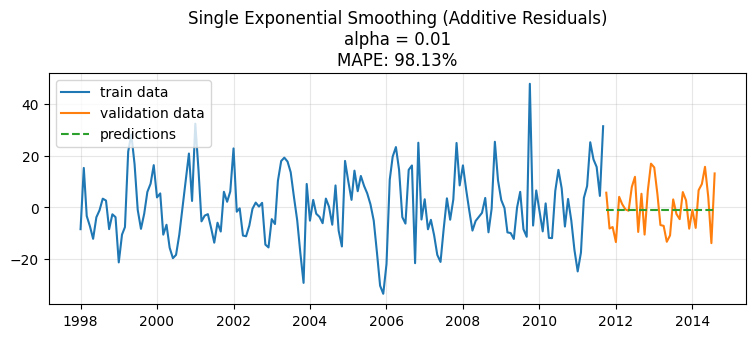

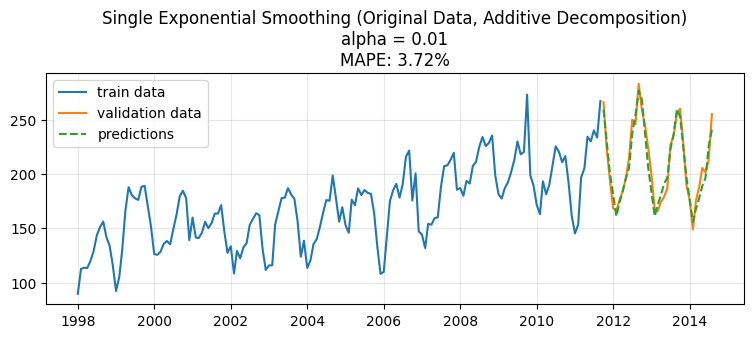

In [85]:
from statsmodels.tsa.api import SimpleExpSmoothing

best_mape = float('inf')
best_level = 0
for smoothing_level in np.arange(0, 1, 0.01):
    single = SimpleExpSmoothing(ad_train_residuals).fit(optimized=False, smoothing_level=smoothing_level)
    single_preds = single.forecast(len(ad_val_residuals))
    single_mape = mean_absolute_percentage_error(ad_val_residuals, single_preds)
    if single_mape < best_mape:
        best_mape = single_mape
        best_level = smoothing_level

single = SimpleExpSmoothing(ad_train_residuals).fit(optimized=False, smoothing_level=best_level)
single_preds = single.forecast(len(ad_val_residuals))
single_mape = mean_absolute_percentage_error(ad_val_residuals, single_preds)

plt.plot(pd.Series(data=ad_train_residuals, index=train.index), label='train data')
plt.plot(pd.Series(data=ad_val_residuals, index=validation.index), label='validation data')
plt.plot(pd.Series(data=single_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Single Exponential Smoothing (Additive Residuals)\nalpha = {best_level}\nMAPE: {round(single_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

full_preds = single_preds + ad_val_trend + ad_val_season
single_mape = mean_absolute_percentage_error(ts_validation, full_preds)
plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Single Exponential Smoothing (Original Data, Additive Decomposition)\nalpha = {best_level}\nMAPE: {round(single_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()


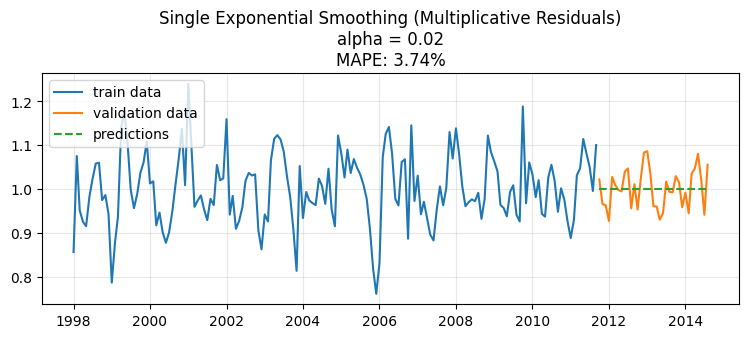

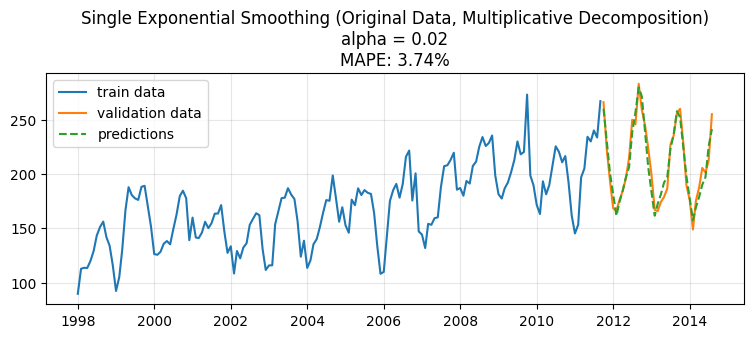

In [86]:
best_mape = float('inf')
best_level = 0
for smoothing_level in np.arange(0, 1, 0.01):
    single = SimpleExpSmoothing(mul_train_residuals).fit(optimized=False, smoothing_level=smoothing_level)
    single_preds = single.forecast(len(mul_val_residuals))
    single_mape = mean_absolute_percentage_error(mul_val_residuals, single_preds)
    if single_mape < best_mape:
        best_mape = single_mape
        best_level = smoothing_level

single = SimpleExpSmoothing(mul_train_residuals).fit(optimized=False, smoothing_level=best_level)
single_preds = single.forecast(len(mul_val_residuals))
single_mape = mean_absolute_percentage_error(mul_val_residuals, single_preds)

plt.plot(pd.Series(data=mul_train_residuals, index=train.index), label='train data')
plt.plot(pd.Series(data=mul_val_residuals, index=validation.index), label='validation data')
plt.plot(pd.Series(data=single_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Single Exponential Smoothing (Multiplicative Residuals)\nalpha = {best_level}\nMAPE: {round(single_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

full_preds = single_preds * mul_val_trend * mul_val_season
single_mape = mean_absolute_percentage_error(ts_validation, full_preds)
plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Single Exponential Smoothing (Original Data, Multiplicative Decomposition)\nalpha = {best_level}\nMAPE: {round(single_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

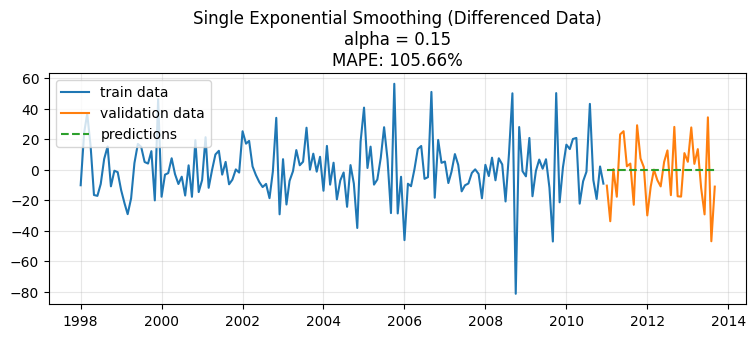

In [87]:
best_mape = float('inf')
best_level = 0
for smoothing_level in np.arange(0, 1, 0.01):
    single = SimpleExpSmoothing(diff_train).fit(optimized=False, smoothing_level=smoothing_level)
    single_preds = single.forecast(len(diff_validation))
    single_mape = mean_absolute_percentage_error(diff_validation, single_preds)
    if single_mape < best_mape:
        best_mape = single_mape
        best_level = smoothing_level

single = SimpleExpSmoothing(diff_train).fit(optimized=False, smoothing_level=best_level)
single_preds = single.forecast(len(diff_validation))
single_mape = mean_absolute_percentage_error(diff_validation, single_preds)

plt.plot(pd.Series(data=diff_train, index=diff_train.index), label='train data')
plt.plot(pd.Series(data=diff_validation, index=diff_validation.index), label='validation data')
plt.plot(pd.Series(data=single_preds, index=diff_validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Single Exponential Smoothing (Differenced Data)\nalpha = {best_level}\nMAPE: {round(single_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

## **3. Double Exponential Smoothing**

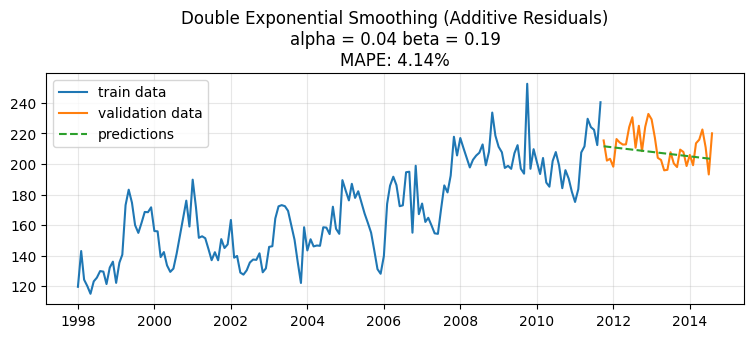

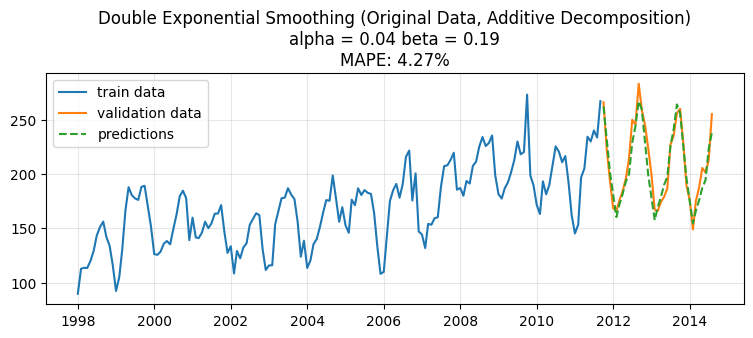

In [88]:
from statsmodels.tsa.api import Holt

best_level = 0
best_slope = 0
best_mape = float('inf')
for smoothing_level in np.arange(0, 1, 0.01):
    for smoothing_slope in np.arange(0, 1, 0.01):
        double = Holt(ad_train_residuals+ad_train_trend).fit(optimized=False, smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)
        double_preds = double.forecast(len(ad_val_residuals+ad_val_trend))
        double_mape = mean_absolute_percentage_error(ad_val_residuals+ad_val_trend, double_preds)
        if double_mape < best_mape:
            best_mape = double_mape
            best_level = smoothing_level
            best_slope = smoothing_slope

double = Holt(ad_train_residuals+ad_train_trend).fit(optimized=False, smoothing_level=best_level, smoothing_slope=best_slope)
double_preds = double.forecast(len(ad_val_residuals+ad_val_trend))
double_mape = mean_absolute_percentage_error(ad_val_residuals+ad_val_trend, double_preds)

plt.plot(pd.Series(data=ad_train_residuals+ad_train_trend, index=train.index), label='train data')
plt.plot(pd.Series(data=ad_val_residuals+ad_val_trend, index=validation.index), label='validation data')
plt.plot(pd.Series(data=double_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Double Exponential Smoothing (Additive Residuals)\nalpha = {best_level} beta = {best_slope}\nMAPE: {round(double_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

full_preds = double_preds + ad_val_season
double_mape = mean_absolute_percentage_error(ts_validation, full_preds)
plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Double Exponential Smoothing (Original Data, Additive Decomposition)\nalpha = {best_level} beta = {best_slope}\nMAPE: {round(double_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

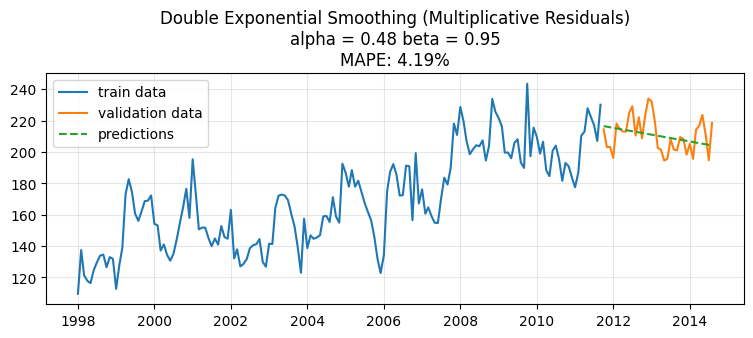

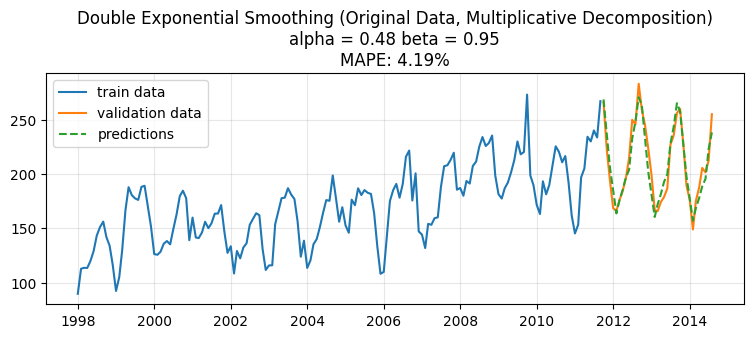

In [89]:
best_level = 0
best_slope = 0
best_mape = float('inf')
for smoothing_level in np.arange(0, 1, 0.01):
    for smoothing_slope in np.arange(0, 1, 0.01):
        double = Holt(mul_train_residuals*mul_train_trend).fit(optimized=False, smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)
        double_preds = double.forecast(len(mul_val_residuals*mul_val_trend))
        double_mape = mean_absolute_percentage_error(mul_val_residuals*mul_val_trend, double_preds)
        if double_mape < best_mape:
            best_mape = double_mape
            best_level = smoothing_level
            best_slope = smoothing_slope

double = Holt(mul_train_residuals*mul_train_trend).fit(optimized=False, smoothing_level=best_level, smoothing_slope=best_slope)
double_preds = double.forecast(len(mul_val_residuals*mul_val_trend))
double_mape = mean_absolute_percentage_error(mul_val_residuals*mul_val_trend, double_preds)

plt.plot(pd.Series(data=mul_train_residuals*mul_train_trend, index=train.index), label='train data')
plt.plot(pd.Series(data=mul_val_residuals*mul_val_trend, index=validation.index), label='validation data')
plt.plot(pd.Series(data=double_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Double Exponential Smoothing (Multiplicative Residuals)\nalpha = {best_level} beta = {round(best_slope, 2)}\nMAPE: {round(double_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

full_preds = double_preds * mul_val_season
double_mape = mean_absolute_percentage_error(ts_validation, full_preds)
plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Double Exponential Smoothing (Original Data, Multiplicative Decomposition)\nalpha = {best_level} beta = {round(best_slope, 2)}\nMAPE: {round(double_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

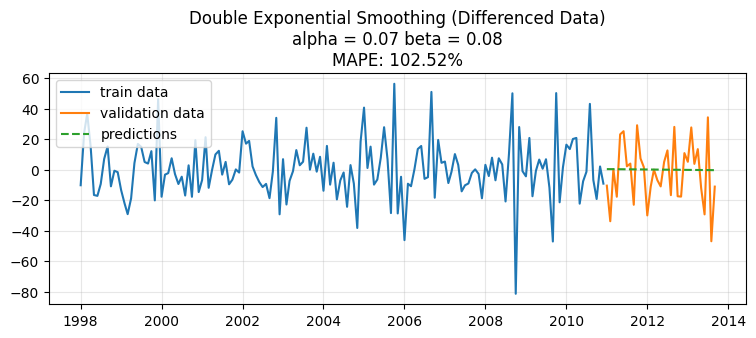

In [90]:
best_level = 0
best_slope = 0
best_mape = float('inf')
for smoothing_level in np.arange(0, 1, 0.01):
    for smoothing_slope in np.arange(0, 1, 0.01):
        double = Holt(diff_train).fit(optimized=False, smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)
        double_preds = double.forecast(len(diff_validation))
        double_mape = mean_absolute_percentage_error(diff_validation, double_preds)
        if double_mape < best_mape:
            best_mape = double_mape
            best_level = smoothing_level
            best_slope = smoothing_slope

double = Holt(diff_train).fit(optimized=False, smoothing_level=best_level, smoothing_slope=best_slope)
double_preds = double.forecast(len(diff_validation))
double_mape = mean_absolute_percentage_error(diff_validation, double_preds)

plt.plot(pd.Series(data=diff_train, index=diff_train.index), label='train data')
plt.plot(pd.Series(data=diff_validation, index=diff_validation.index), label='validation data')
plt.plot(pd.Series(data=double_preds, index=diff_validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Double Exponential Smoothing (Differenced Data)\nalpha = {best_level} beta = {best_slope}\nMAPE: {round(double_mape, 2)}%')
plt.grid(alpha=0.3)

## **4. Triple Exponential Smoothing**

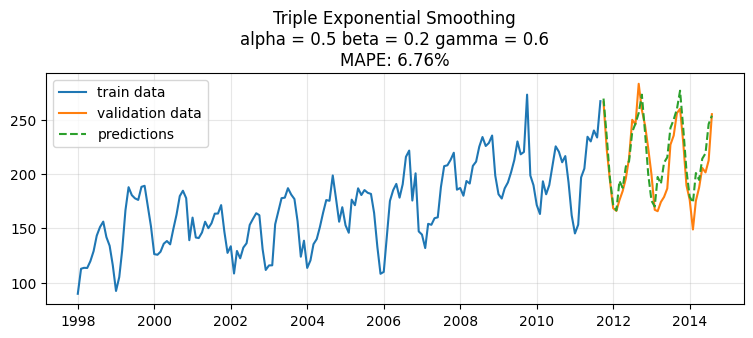

In [91]:
from statsmodels.tsa.api import ExponentialSmoothing


best_level = 0
best_slope = 0
best_seasonal = 0
best_mape = float('inf')
for smoothing_level in np.arange(0, 1, 0.1):
    for smoothing_slope in np.arange(0, 1, 0.1):
        for smoothing_seasonal in np.arange(0, 1, 0.1):
            triple = ExponentialSmoothing(ts_train,
                                        trend='additive',
                                        seasonal='additive',
                                        seasonal_periods=12).fit(optimized=False, smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
            triple_preds = triple.forecast(len(ts_validation))
            triple_mape = mean_absolute_percentage_error(ts_validation, triple_preds)
            if triple_mape < best_mape:
                best_mape = triple_mape
                best_level = smoothing_level
                best_slope = smoothing_slope
                best_seasonal = smoothing_seasonal

triple = ExponentialSmoothing(ts_train,
                                        trend='additive',
                                        seasonal='additive',
                                        seasonal_periods=12).fit(optimized=False, smoothing_level=best_level, smoothing_slope=best_slope, smoothing_seasonal=best_seasonal)
triple_preds = triple.forecast(len(ts_validation))
triple_mape = mean_absolute_percentage_error(ts_validation, triple_preds)

plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=triple_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Triple Exponential Smoothing\nalpha = {best_level} beta = {best_slope} gamma = {round(best_seasonal, 2)}\nMAPE: {round(triple_mape, 2)}%')
plt.grid(alpha=0.3)

## **AR Model**

In [92]:
from statsmodels.tsa.arima.model import ARIMA

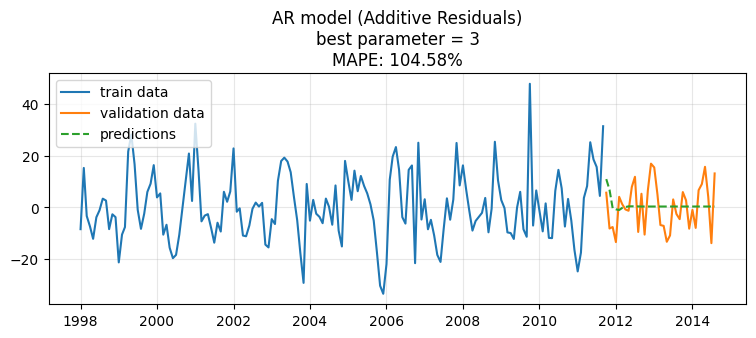

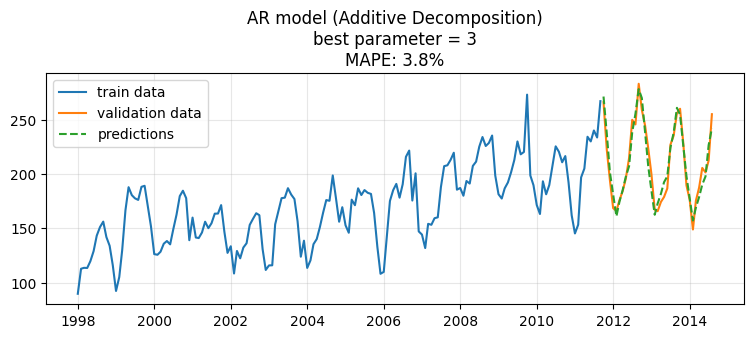

In [93]:
start_index = validation.index[0]
end_index = validation.index[-1]

best_mape = float('inf')
best_param = 1
for i in range(1, 5):
    model = ARIMA(pd.Series(data=ad_train_residuals, index=train.index), order=(i, 0, 0)).fit()
    predictions = model.predict(start=start_index, end=end_index)
    mape = mean_absolute_percentage_error(ad_val_residuals, predictions)
    if mape < best_mape:
        best_mape = mape
        best_param = i

model = ARIMA(pd.Series(data=ad_train_residuals, index=train.index), order=(best_param, 0, 0)).fit()
predictions = model.predict(start=start_index, end=end_index)
mape = mean_absolute_percentage_error(ad_val_residuals, predictions)

plt.plot(pd.Series(data=ad_train_residuals, index=train.index), label='train data')
plt.plot(pd.Series(data=ad_val_residuals, index=validation.index), label='validation data')
plt.plot(pd.Series(data=predictions, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'AR model (Additive Residuals)\nbest parameter = {best_param}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

full_preds = predictions + ad_val_trend + ad_val_season
mape = mean_absolute_percentage_error(ts_validation, full_preds)
plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'AR model (Additive Decomposition)\nbest parameter = {best_param}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()


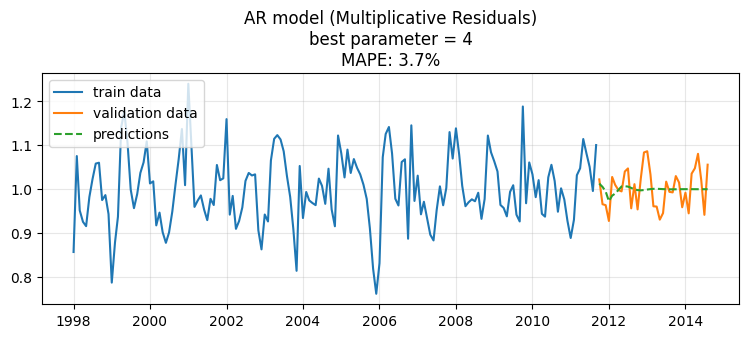

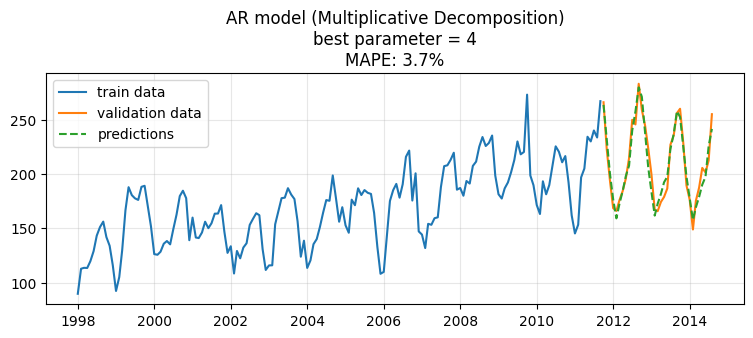

In [94]:
start_index = validation.index[0]
end_index = validation.index[-1]

best_mape = float('inf')
best_param = 1
for i in range(1, 5):
    model = ARIMA(pd.Series(data=mul_train_residuals, index=train.index), order=(i, 0, 0)).fit()
    predictions = model.predict(start=start_index, end=end_index)
    mape = mean_absolute_percentage_error(mul_val_residuals, predictions)
    if mape < best_mape:
        best_mape = mape
        best_param = i

model = ARIMA(pd.Series(data=mul_train_residuals, index=train.index), order=(best_param, 0, 0)).fit()
predictions = model.predict(start=start_index, end=end_index)
mape = mean_absolute_percentage_error(mul_val_residuals, predictions)

plt.plot(pd.Series(data=mul_train_residuals, index=train.index), label='train data')
plt.plot(pd.Series(data=mul_val_residuals, index=validation.index), label='validation data')
plt.plot(pd.Series(data=predictions, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'AR model (Multiplicative Residuals)\nbest parameter = {best_param}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

full_preds = predictions * mul_val_trend * mul_val_season
mape = mean_absolute_percentage_error(ts_validation, full_preds)
plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'AR model (Multiplicative Decomposition)\nbest parameter = {best_param}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()


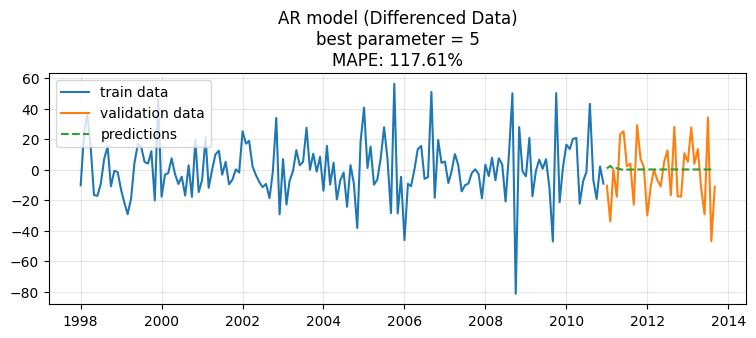

In [95]:
start_index = diff_validation.index[0]
end_index = diff_validation.index[-1]

best_mape = float('inf')
best_param = 1
for i in range(1, 6):
    model = ARIMA(diff_train, order=(i, 0, 0)).fit()
    predictions = model.predict(start=start_index, end=end_index)
    mape = mean_absolute_percentage_error(diff_validation, predictions)
    if mape < best_mape:
        best_mape = mape
        best_param = i

model = ARIMA(diff_train, order=(best_param, 0, 0)).fit()
predictions = model.predict(start=start_index, end=end_index)
mape = mean_absolute_percentage_error(diff_validation, predictions)

plt.plot(diff_train, label='train data')
plt.plot(diff_validation, label='validation data')
plt.plot(pd.Series(data=predictions, index=diff_validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'AR model (Differenced Data)\nbest parameter = {best_param}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)

## **MA Model**

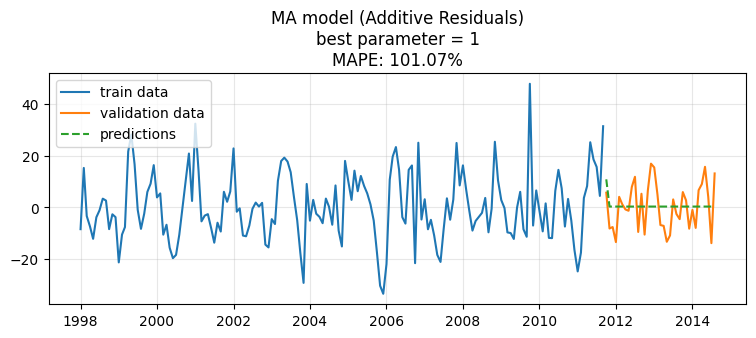

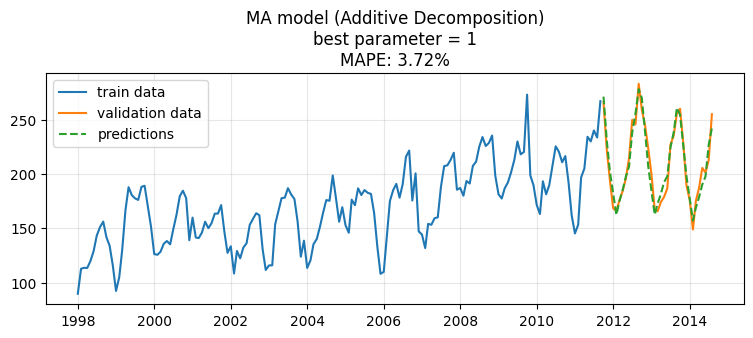

In [96]:
start_index = validation.index[0]
end_index = validation.index[-1]

best_mape = float('inf')
best_param = 1
for i in range(1, 10):
    model = ARIMA(pd.Series(data=ad_train_residuals, index=train.index), order=(0, 0, i)).fit()
    predictions = model.predict(start=start_index, end=end_index)
    mape = mean_absolute_percentage_error(ad_val_residuals, predictions)
    if mape < best_mape:
        best_mape = mape
        best_param = i

model = ARIMA(pd.Series(data=ad_train_residuals, index=train.index), order=(0, 0, best_param)).fit()
predictions = model.predict(start=start_index, end=end_index)
mape = mean_absolute_percentage_error(ad_val_residuals, predictions)

plt.plot(pd.Series(data=ad_train_residuals, index=train.index), label='train data')
plt.plot(pd.Series(data=ad_val_residuals, index=validation.index), label='validation data')
plt.plot(pd.Series(data=predictions, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'MA model (Additive Residuals)\nbest parameter = {best_param}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

full_preds = predictions + ad_val_trend + ad_val_season
mape = mean_absolute_percentage_error(ts_validation, full_preds)
plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'MA model (Additive Decomposition)\nbest parameter = {best_param}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

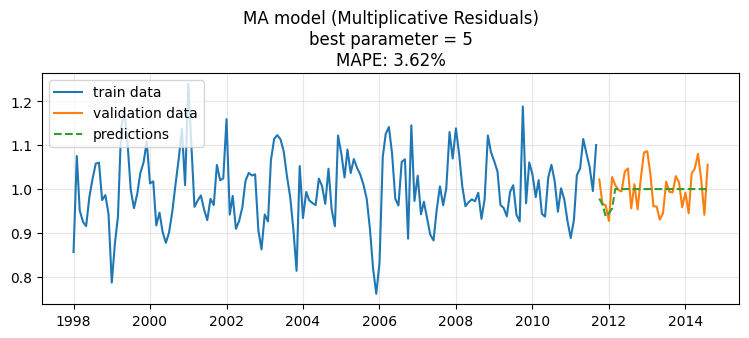

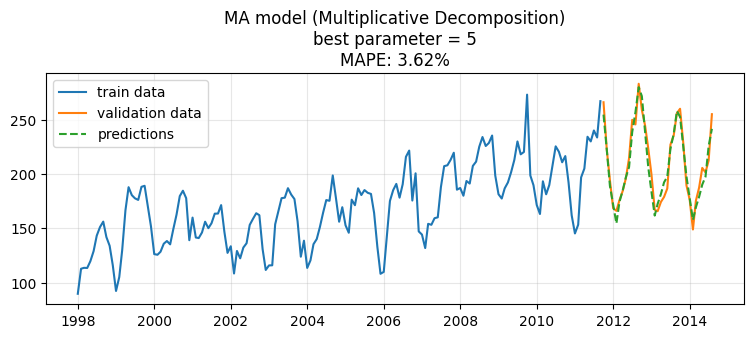

In [97]:
start_index = validation.index[0]
end_index = validation.index[-1]

best_mape = float('inf')
best_param = 1
for i in range(1, 6):
    model = ARIMA(pd.Series(data=mul_train_residuals, index=train.index), order=(0, 0, i)).fit()
    predictions = model.predict(start=start_index, end=end_index)
    mape = mean_absolute_percentage_error(mul_val_residuals, predictions)
    if mape < best_mape:
        best_mape = mape
        best_param = i

model = ARIMA(pd.Series(data=mul_train_residuals, index=train.index), order=(0, 0, best_param)).fit()
predictions = model.predict(start=start_index, end=end_index)
mape = mean_absolute_percentage_error(mul_val_residuals, predictions)

plt.plot(pd.Series(data=mul_train_residuals, index=train.index), label='train data')
plt.plot(pd.Series(data=mul_val_residuals, index=validation.index), label='validation data')
plt.plot(pd.Series(data=predictions, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'MA model (Multiplicative Residuals)\nbest parameter = {best_param}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

full_preds = predictions * mul_val_trend * mul_val_season
mape = mean_absolute_percentage_error(ts_validation, full_preds)
plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'MA model (Multiplicative Decomposition)\nbest parameter = {best_param}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

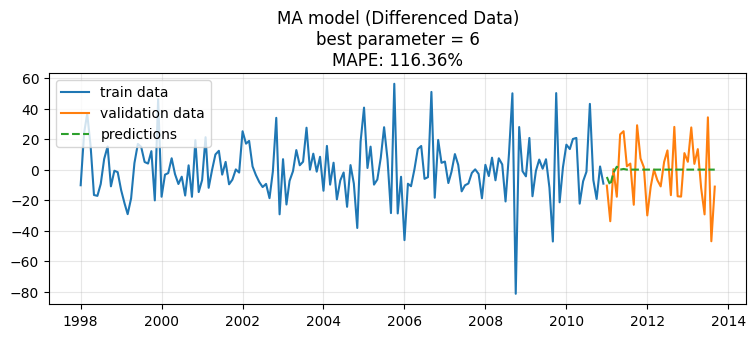

In [98]:
start_index = diff_validation.index[0]
end_index = diff_validation.index[-1]

best_mape = float('inf')
best_param = 1
for i in range(1, 10):
    model = ARIMA(diff_train, order=(0, 0, i)).fit()
    predictions = model.predict(start=start_index, end=end_index)
    mape = mean_absolute_percentage_error(diff_validation, predictions)
    if mape < best_mape:
        best_mape = mape
        best_param = i

model = ARIMA(diff_train, order=(0, 0, best_param)).fit()
predictions = model.predict(start=start_index, end=end_index)
mape = mean_absolute_percentage_error(diff_validation, predictions)

plt.plot(diff_train, label='train data')
plt.plot(diff_validation, label='validation data')
plt.plot(pd.Series(data=predictions, index=diff_validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'MA model (Differenced Data)\nbest parameter = {best_param}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)

## **ARMA Model**

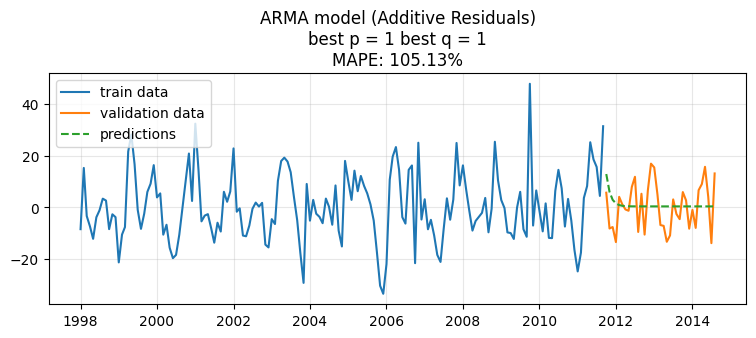

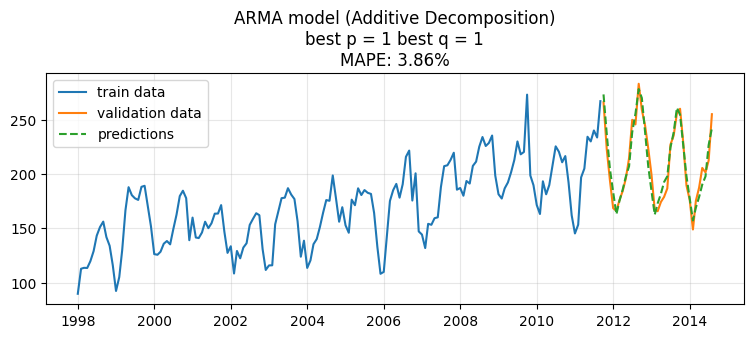

In [99]:
start_index = validation.index[0]
end_index = validation.index[-1]

best_mape = float('inf')
best_p = 1
best_q = 1
for i in range(1, 6):
    for j in range(1, 6):
        model = ARIMA(pd.Series(data=ad_train_residuals, index=train.index), order=(i, 0, j)).fit()
        predictions = model.predict(start=start_index, end=end_index)
        mape = mean_absolute_percentage_error(ad_val_residuals, predictions)
        if mape < best_mape:
            best_mape = mape
            best_p = i
            best_q = j

model = ARIMA(pd.Series(data=ad_train_residuals, index=train.index), order=(best_p, 0, best_q)).fit()
predictions = model.predict(start=start_index, end=end_index)
mape = mean_absolute_percentage_error(ad_val_residuals, predictions)

plt.plot(pd.Series(data=ad_train_residuals, index=train.index), label='train data')
plt.plot(pd.Series(data=ad_val_residuals, index=validation.index), label='validation data')
plt.plot(pd.Series(data=predictions, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'ARMA model (Additive Residuals)\nbest p = {best_p} best q = {best_q}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

full_preds = predictions + ad_val_trend + ad_val_season
mape = mean_absolute_percentage_error(ts_validation, full_preds)
plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'ARMA model (Additive Decomposition)\nbest p = {best_p} best q = {best_q}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

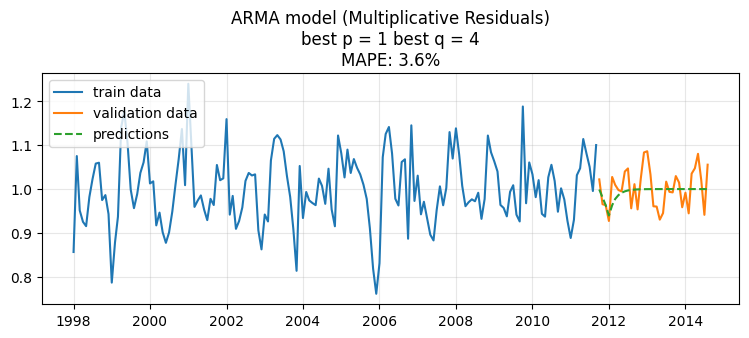

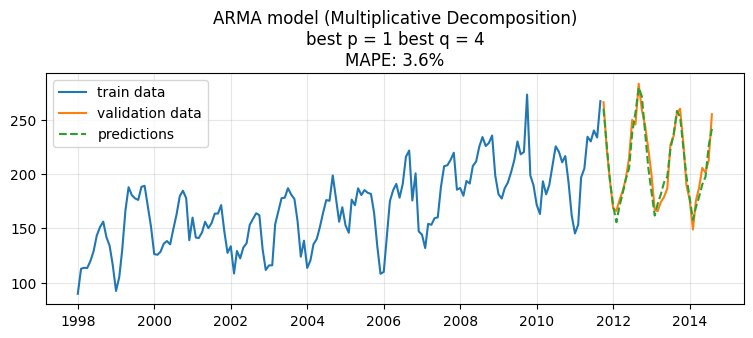

In [100]:
start_index = validation.index[0]
end_index = validation.index[-1]

best_mape = float('inf')
best_p = 1
best_q = 1
for i in range(1, 6):
    for j in range(1, 6):
        model = ARIMA(pd.Series(data=mul_train_residuals, index=train.index), order=(i, 0, j)).fit()
        predictions = model.predict(start=start_index, end=end_index)
        mape = mean_absolute_percentage_error(mul_val_residuals, predictions)
        if mape < best_mape:
            best_mape = mape
            best_p = i
            best_q = j

model = ARIMA(pd.Series(data=mul_train_residuals, index=train.index), order=(best_p, 0, best_q)).fit()
predictions = model.predict(start=start_index, end=end_index)
mape = mean_absolute_percentage_error(mul_val_residuals, predictions)

plt.plot(pd.Series(data=mul_train_residuals, index=train.index), label='train data')
plt.plot(pd.Series(data=mul_val_residuals, index=validation.index), label='validation data')
plt.plot(pd.Series(data=predictions, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'ARMA model (Multiplicative Residuals)\nbest p = {best_p} best q = {best_q}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

full_preds = predictions * mul_val_trend * mul_val_season
mape = mean_absolute_percentage_error(ts_validation, full_preds)
plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'ARMA model (Multiplicative Decomposition)\nbest p = {best_p} best q = {best_q}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

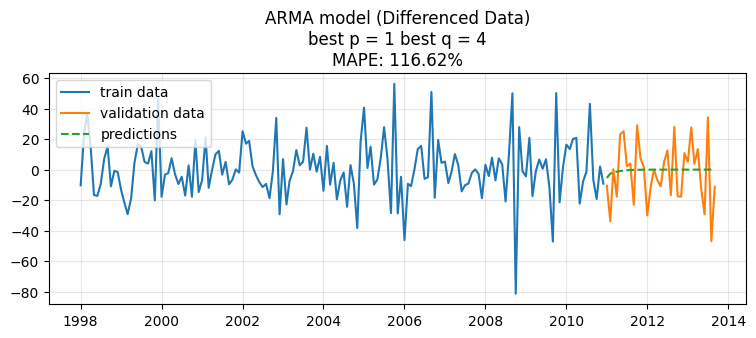

In [101]:
start_index = diff_validation.index[0]
end_index = diff_validation.index[-1]

best_mape = float('inf')
best_p = 1
best_q = 1
for i in range(1, 10):
    for j in range(1, 10):
        model = ARIMA(diff_train, order=(i, 0, j)).fit()
        predictions = model.predict(start=start_index, end=end_index)
        mape = mean_absolute_percentage_error(diff_validation, predictions)
        if mape < best_mape:
            best_mape = mape
            best_p = i
            best_q = j

model = ARIMA(diff_train, order=(best_p, 0, best_q)).fit()
predictions = model.predict(start=start_index, end=end_index)
mape = mean_absolute_percentage_error(diff_validation, predictions)

plt.plot(diff_train, label='train data')
plt.plot(diff_validation, label='validation data')
plt.plot(pd.Series(data=predictions, index=diff_validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'ARMA model (Differenced Data)\nbest p = {best_p} best q = {best_q}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)

## **ARIMA Model**

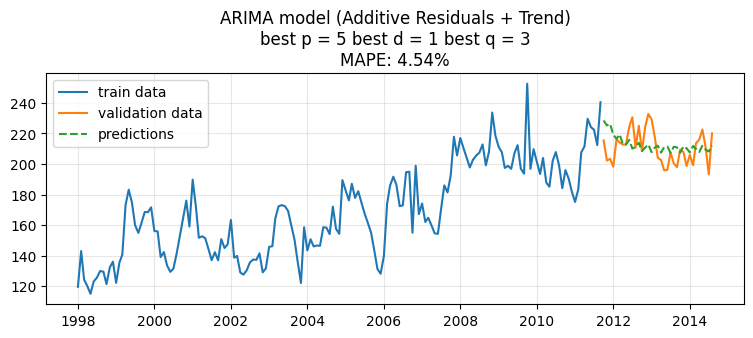

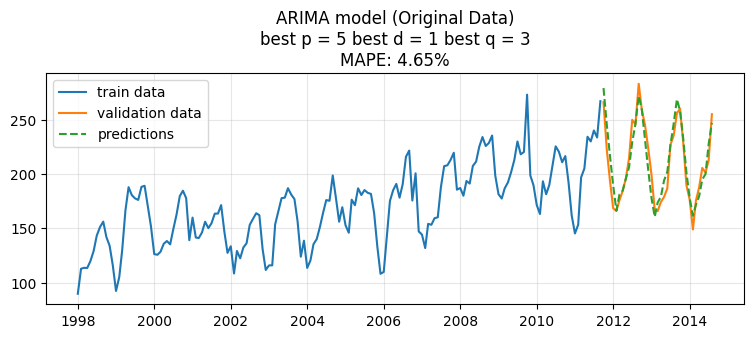

In [102]:
start_index = validation.index[0]
end_index = validation.index[-1]

best_mape = float('inf')
best_p = 1
best_d = 1
best_q = 1
for i in range(1, 6):
    for j in range(1, 5):
        for k in range(1, 2):
            model = ARIMA(pd.Series(ad_train_residuals + ad_train_trend, index=train.index), order=(i, k, j)).fit()
            predictions = model.predict(start=start_index, end=end_index)
            mape = mean_absolute_percentage_error(ad_val_residuals + ad_val_trend, predictions)
            if mape < best_mape:
                best_mape = mape
                best_p = i
                best_q = j
                best_d = k

model = ARIMA(pd.Series(ad_train_residuals + ad_train_trend, index=train.index), order=(best_p, best_d, best_q)).fit()
predictions = model.predict(start=start_index, end=end_index)
mape = mean_absolute_percentage_error(ad_val_residuals + ad_val_trend, predictions)

plt.plot(pd.Series(ad_train_residuals + ad_train_trend, index=train.index), label='train data')
plt.plot(pd.Series(ad_val_residuals + ad_val_trend, index=validation.index), label='validation data')
plt.plot(pd.Series(data=predictions, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'ARIMA model (Additive Residuals + Trend)\nbest p = {best_p} best d = {best_d} best q = {best_q}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

full_preds = predictions + ad_val_season
mape = mean_absolute_percentage_error(ts_validation, full_preds)
plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'ARIMA model (Original Data)\nbest p = {best_p} best d = {best_d} best q = {best_q}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()


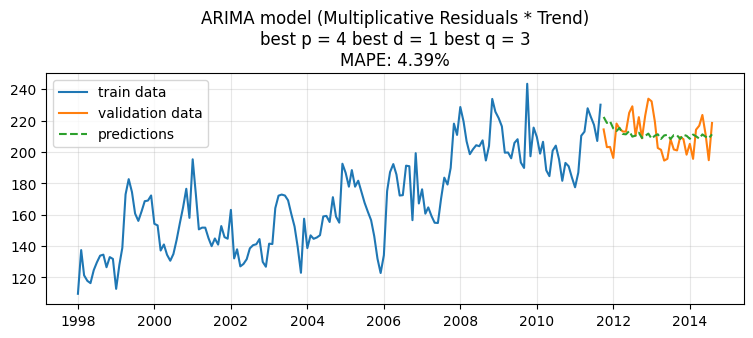

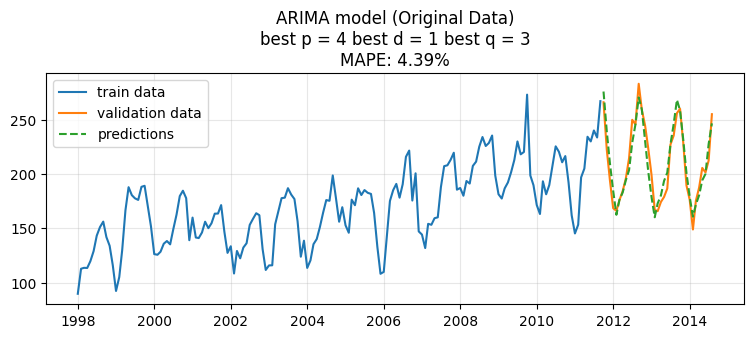

In [103]:
start_index = validation.index[0]
end_index = validation.index[-1]

best_mape = float('inf')
best_p = 1
best_d = 1
best_q = 1
for i in range(1, 6):
    for j in range(1, 6):
        for k in range(1, 2):
            model = ARIMA(pd.Series(mul_train_residuals * mul_train_trend, index=train.index), order=(i, k, j)).fit()
            predictions = model.predict(start=start_index, end=end_index)
            mape = mean_absolute_percentage_error(mul_val_residuals * mul_val_trend, predictions)
            if mape < best_mape:
                best_mape = mape
                best_p = i
                best_q = j
                best_d = k

model = ARIMA(pd.Series(mul_train_residuals * mul_train_trend, index=train.index), order=(best_p, best_d, best_q)).fit()
predictions = model.predict(start=start_index, end=end_index)
mape = mean_absolute_percentage_error(mul_val_residuals * mul_val_trend, predictions)

plt.plot(pd.Series(mul_train_residuals * mul_train_trend, index=train.index), label='train data')
plt.plot(pd.Series(mul_val_residuals * mul_val_trend, index=validation.index), label='validation data')
plt.plot(pd.Series(data=predictions, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'ARIMA model (Multiplicative Residuals * Trend)\nbest p = {best_p} best d = {best_d} best q = {best_q}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

full_preds = predictions * mul_val_season
mape = mean_absolute_percentage_error(ts_validation, full_preds)
plt.plot(pd.Series(data=ts_train, index=train.index), label='train data')
plt.plot(pd.Series(data=ts_validation, index=validation.index), label='validation data')
plt.plot(pd.Series(data=full_preds, index=validation.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'ARIMA model (Original Data)\nbest p = {best_p} best d = {best_d} best q = {best_q}\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

## **Testing with Test Data**

In [104]:
models = pd.DataFrame(columns=['Model', 'Data', 'MAPE'])

In [105]:
ad_train_val_residuals = np.concatenate([ad_train_residuals, ad_val_residuals])
ad_train_val_trend = np.concatenate([ad_train_trend, ad_val_trend])
ad_train_val_season = np.concatenate([ad_train_season, ad_val_season])

mul_train_val_residuals = np.concatenate([mul_train_residuals, mul_val_residuals])
mul_train_val_trend = np.concatenate([mul_train_trend, mul_val_trend])
mul_train_val_season = np.concatenate([mul_train_season, mul_val_season])

ts_train_val = np.concatenate([ts_train, ts_validation])

train_validation = pd.concat([train, validation])

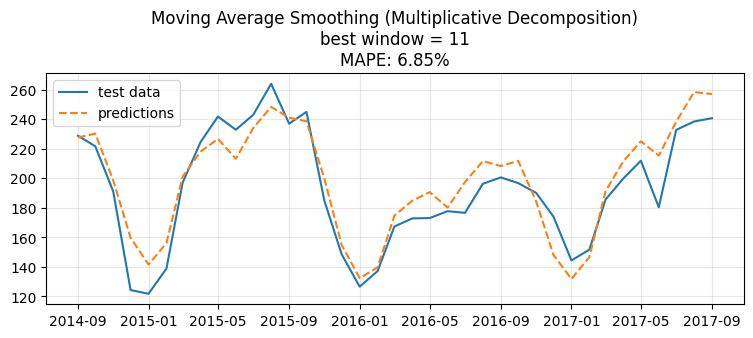

In [106]:
predictions = moving_average(mul_train_val_residuals, len(mul_test_residuals), 11)

full_preds = predictions * mul_test_trend * mul_test_season
ma_mape = mean_absolute_percentage_error(ts_test, full_preds)
plt.plot(pd.Series(data=ts_test, index=test.index), label='test data')
plt.plot(pd.Series(data=full_preds, index=test.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Moving Average Smoothing (Multiplicative Decomposition)\nbest window = {best_window}\nMAPE: {round(ma_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

row = ['MAS', 'Multiplicative', f'{round(ma_mape, 2)}%']
models.loc[len(models)] = row

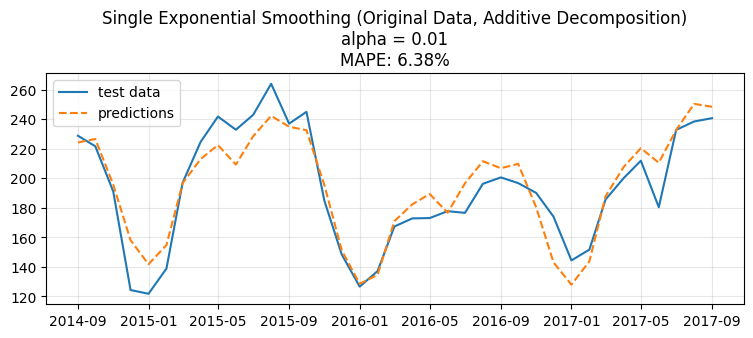

In [107]:
single = SimpleExpSmoothing(ad_train_val_residuals).fit(optimized=False, smoothing_level=0.01)
single_preds = single.forecast(len(ad_test_residuals))

full_preds = single_preds + ad_test_trend + ad_test_season
single_mape = mean_absolute_percentage_error(ts_test, full_preds)
plt.plot(pd.Series(data=ts_test, index=test.index), label='test data')
plt.plot(pd.Series(data=full_preds, index=test.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Single Exponential Smoothing (Original Data, Additive Decomposition)\nalpha = 0.01\nMAPE: {round(single_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

row = ['SES', 'Additive', f'{round(single_mape, 2)}%']
models.loc[len(models)] = row

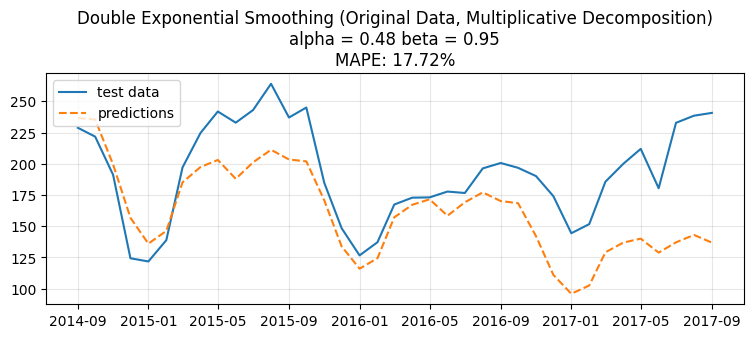

In [108]:
double = Holt(mul_train_val_residuals*mul_train_val_trend).fit(optimized=False, smoothing_level=0.48, smoothing_slope=0.95)
double_preds = double.forecast(len(mul_test_residuals*mul_test_trend))

full_preds = double_preds * mul_test_season
double_mape = mean_absolute_percentage_error(ts_test, full_preds)
plt.plot(pd.Series(data=ts_test, index=test.index), label='test data')
plt.plot(pd.Series(data=full_preds, index=test.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Double Exponential Smoothing (Original Data, Multiplicative Decomposition)\nalpha = 0.48 beta = 0.95\nMAPE: {round(double_mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

row = ['DES', 'Multiplicative', f'{round(double_mape, 2)}%']
models.loc[len(models)] = row

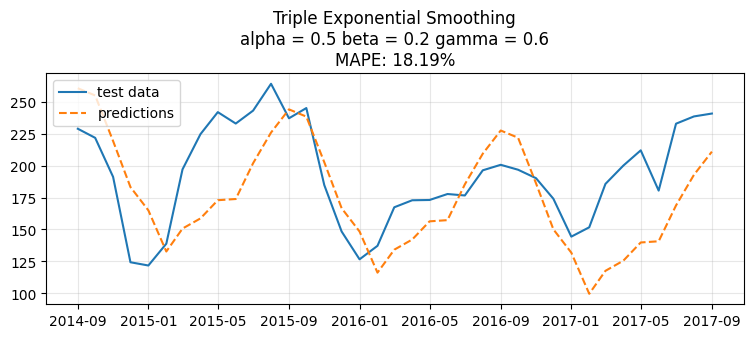

In [109]:
triple = ExponentialSmoothing(ts_train_val,
                                        trend='additive',
                                        seasonal='additive',
                                        seasonal_periods=12).fit(optimized=False, smoothing_level=0.5, smoothing_slope=0.2, smoothing_seasonal=0.6)
triple_preds = triple.forecast(len(ts_test))
triple_mape = mean_absolute_percentage_error(ts_test, triple_preds)

plt.plot(pd.Series(data=ts_test, index=test.index), label='test data')
plt.plot(pd.Series(data=triple_preds, index=test.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'Triple Exponential Smoothing\nalpha = 0.5 beta = 0.2 gamma = 0.6\nMAPE: {round(triple_mape, 2)}%')
plt.grid(alpha=0.3)

row = ['TES', 'Additive', f'{round(triple_mape, 2)}%']
models.loc[len(models)] = row

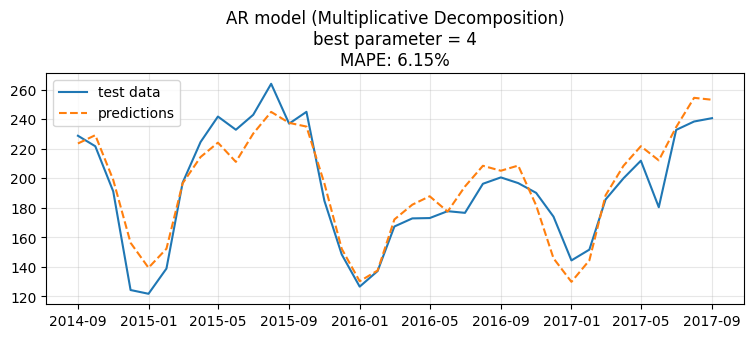

In [110]:
start_index = test.index[0]
end_index = test.index[-1]

model = ARIMA(pd.Series(data=mul_train_val_residuals, index=train_validation.index), order=(4, 0, 0)).fit()
predictions = model.predict(start=start_index, end=end_index)

full_preds = predictions * mul_test_trend * mul_test_season
mape = mean_absolute_percentage_error(ts_test, full_preds)
plt.plot(pd.Series(data=ts_test, index=test.index), label='test data')
plt.plot(pd.Series(data=full_preds, index=test.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'AR model (Multiplicative Decomposition)\nbest parameter = 4\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

row = ['AR', 'Multiplicative', f'{round(mape, 2)}%']
models.loc[len(models)] = row

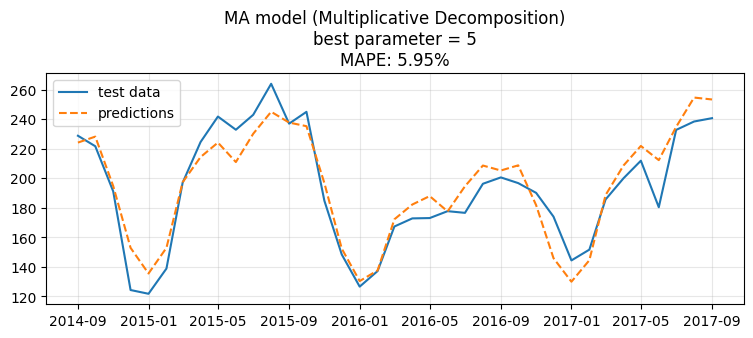

In [111]:
start_index = test.index[0]
end_index = test.index[-1]

model = ARIMA(pd.Series(data=mul_train_val_residuals, index=train_validation.index), order=(0, 0, 5)).fit()
predictions = model.predict(start=start_index, end=end_index)

full_preds = predictions * mul_test_trend * mul_test_season
mape = mean_absolute_percentage_error(ts_test, full_preds)
plt.plot(pd.Series(data=ts_test, index=test.index), label='test data')
plt.plot(pd.Series(data=full_preds, index=test.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'MA model (Multiplicative Decomposition)\nbest parameter = 5\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

row = ['MA', 'Multiplicative', f'{round(mape, 2)}%']
models.loc[len(models)] = row

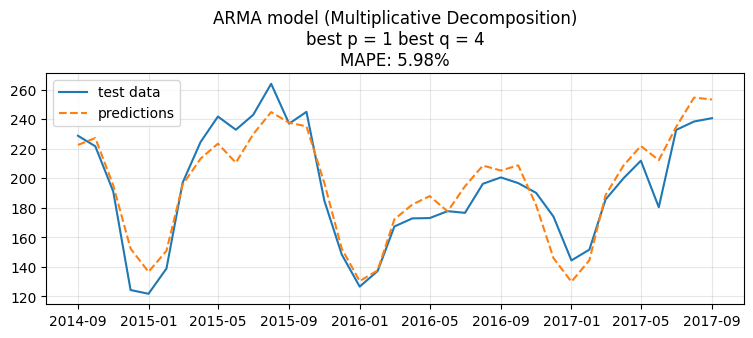

In [112]:
start_index = test.index[0]
end_index = test.index[-1]

model = ARIMA(pd.Series(data=mul_train_val_residuals, index=train_validation.index), order=(1, 0, 4)).fit()
predictions = model.predict(start=start_index, end=end_index)

full_preds = predictions * mul_test_trend * mul_test_season
mape = mean_absolute_percentage_error(ts_test, full_preds)
plt.plot(pd.Series(data=ts_test, index=test.index), label='test data')
plt.plot(pd.Series(data=full_preds, index=test.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'ARMA model (Multiplicative Decomposition)\nbest p = 1 best q = 4\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

row = ['ARMA', 'Multiplicative', f'{round(mape, 2)}%']
models.loc[len(models)] = row

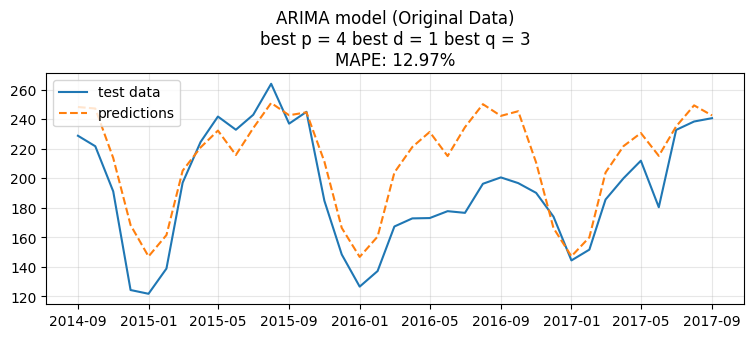

In [113]:
start_index = test.index[0]
end_index = test.index[-1]

model = ARIMA(pd.Series(mul_train_val_residuals * mul_train_val_trend, index=train_validation.index), order=(4, 1, 3)).fit()
predictions = model.predict(start=start_index, end=end_index)

full_preds = predictions * mul_test_season
mape = mean_absolute_percentage_error(ts_test, full_preds)
plt.plot(pd.Series(data=ts_test, index=test.index), label='test data')
plt.plot(pd.Series(data=full_preds, index=test.index), linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title(f'ARIMA model (Original Data)\nbest p = 4 best d = 1 best q = 3\nMAPE: {round(mape, 2)}%')
plt.grid(alpha=0.3)
plt.show()

row = ['ARIMA', 'Multiplicative', f'{round(mape, 2)}%']
models.loc[len(models)] = row

## **Forecasting**

**It can be seen that AM and ARMA models performed the best, but since ARMA model is more complicated and these time series have complicated trend, I will use it for forecasting**

In [114]:
models

Model            Data    MAPE
0    MAS  Multiplicative   6.85%
1    SES        Additive   6.38%
2    DES  Multiplicative  17.72%
3    TES        Additive  18.19%
4     AR  Multiplicative   6.15%
5     MA  Multiplicative   5.95%
6   ARMA  Multiplicative   5.98%
7  ARIMA  Multiplicative  12.97%

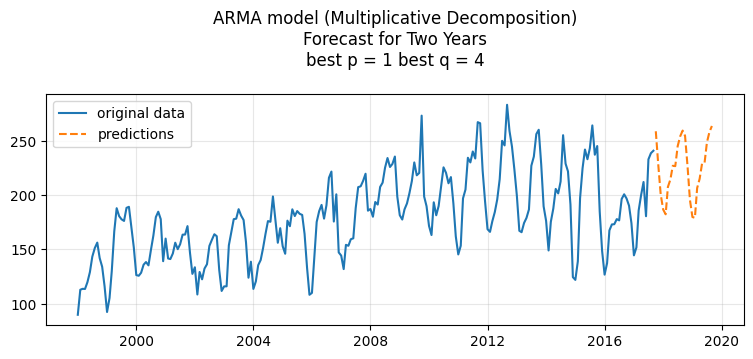

In [115]:
ss_decomposition = seasonal_decompose(x=ts, model='multiplicative', period=12, extrapolate_trend=True)
predicted_season = ss_decomposition.seasonal[-24:]

start_index = new_dates[0]
end_index = new_dates[-1]

model = ARIMA(pd.Series(data=ss_decomposition.resid, index=df.index), order=(1, 0, 4)).fit()
predictions = model.predict(start=start_index, end=end_index)

full_preds = predictions.to_numpy() * predicted_trend.to_numpy() * predicted_season.to_numpy()
full_preds = pd.Series(data=full_preds, index=new_dates)

plt.plot(pd.Series(data=ts, index=df.index), label='original data')
plt.plot(full_preds, linestyle='--', label='predictions')
plt.legend(loc='upper left')
plt.title('ARMA model (Multiplicative Decomposition)\nForecast for Two Years\nbest p = 1 best q = 4\n')
plt.grid(alpha=0.3)
plt.show()

In [116]:
full_preds

2017-10-01    258.620104
2017-11-01    227.619779
2017-12-01    200.589294
2018-01-01    186.602866
2018-02-01    182.182308
2018-03-01    207.374039
2018-04-01    214.186109
2018-05-01    226.856810
2018-06-01    226.514299
2018-07-01    244.939109
2018-08-01    253.909135
2018-09-01    259.250127
2018-10-01    254.415124
2018-11-01    226.475893
2018-12-01    195.462730
2019-01-01    179.681392
2019-02-01    178.946605
2019-03-01    206.325791
2019-04-01    214.870666
2019-05-01    228.787366
2019-06-01    229.212572
2019-07-01    248.387832
2019-08-01    257.833271
2019-09-01    263.481696
Freq: MS, dtype: float64